# Проект: Исследование данных о продажах игр <a id="title"></a>

**Цель исследования:**
1. Проанализировать данные о продажах игр на разных платформах, определить актуальный период, подходящий для прогнозов на 2017 год.
2. Выявить определяющие успешность игры закономерности.
3. Составить портрет пользователя каждого из трех регионов - NA, EU и JP.
4. Проверить гипотезы о пользовательских рейтингах:
    + Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?
    + Разные ли средние пользовательские рейтинги жанров Action и Sports?


**Ход исследования:**

Данные получаем из файла: ```games.csv```. Он содержит исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
Описание данных:
+ ```Name``` — название игры
+ ```Platform``` — платформа
+ ```Year_of_Release``` — год выпуска
+ ```Genre``` — жанр игры
+ ```NA_sales``` — продажи в Северной Америке (миллионы проданных копий)
+ ```EU_sales``` — продажи в Европе (миллионы проданных копий)
+ ```JP_sales``` — продажи в Японии (миллионы проданных копий)
+ ```Other_sales``` — продажи в других странах (миллионы проданных копий)
+ ```Critic_Score``` — оценка критиков (максимум 100)
+ ```User_Score``` — оценка пользователей (максимум 10)
+ ```Rating``` — рейтинг от организации ESRB.

Мы проверим данные на наличие пропусков и дубликатов, исправим проблемы в названиях столбцов, приведем данные к нужному формату. Кроме того, добавим вспомогательный столбец с суммарными продажами. 

Затем проведем анализ данных, опишем общую информацию о платформах. Посмотрим, как менялись продажи по платформам. Выберем актуальный период, данные за который будем использовать при дальнейшем анализе и прогнозировании. Для актуального периода определим самые популярные платформы, оценим влияние рейтингов на продажи и посмотрим на распределение игр по жанрам.

Затем составим портрет пользователя по регионам - посмотрим, игры с какими характеристиками популярны в каждом из регионов.

Затем, используя исходные и вычисленные нами данные, проверим предоставленные гипотезы о средних пользовательских рейтингах.

Таким образом, исследование пройдет в шесть этапов:
1. Загрузка данных
2. Предобработка данных:
    + переименование столбцов
    + проверка наличия пропусков
    + преобразование типов данных
    + проверка наличия дубликатов
    + добавление столбца с суммарными продажами
3. Исследовательский анализ данных - описание и визуализация следующей информации:
    + исследование количества выпущенных игр по годам
    + анализ динамики продаж игр по платформам
    + определение актуального периода для прогнозов на 2017 год
    + выделение лидирующих платформ по продажам за актуальный период
    + оценка влияния отзывов критиков и пользователей на продажи игр (для самой популярной платформы и для всех остальных)
    + изучение распределения игр по жанрам
4. Составление портрета пользователя для каждого региона:
    + определение наиболее популярных платформ
    + определение наиболее популярных жанров
    + проверка влияния рейтинга ESRB на продажи в регионе
5. Проверка гипотез:
    + проверка, одинаковы ли средние пользовательские рейтинги для Xbox One и PC
    + проверка, различаются ли средние пользовательские рейтинги жанров Action и Sports
6. Написание общего вывода

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st

In [3]:
data = pd.read_csv('./datasets/games.csv')

Выведем первые строки датафрейма.

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем общую информацию о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме 11 столбцов. 6 столбцов содержат вещественные числа - ```Year_of_Release```, ```NA_sales```, ```EU_sales```, ```JP_sales```, ```Other_sales```, ```Critic_Score```. 5 столбцов содержат строки - ```Name```, ```Platform```, ```Genre```, ```User_Score```, ```Rating```.

## Предобработка данных

### Переименование столбцов

Переименуем столбцы - приведем названия к нижнему регистру.

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Привели названия столбцов к нижнему регистру. Других проблем в названиях нет.

### Обработка пропусков

Прежде чем преобразовывать типы, обработаем пропущенные значения. Так нам, например, не будут мешать NaN при преобразовании из float в int.

Посмотрим, какие столбцы содержат пропущенные значения.

In [9]:
(data
 .isna()
 .agg(['sum', 'mean'])
 .transpose()
 .sort_values(by='mean', ascending=False)
 .style.format({'sum':'{:.0f}', 'mean': '{:.2%}'})
)

,sum,mean
critic_score,8578,51.32%
rating,6766,40.48%
user_score,6701,40.09%
year_of_release,269,1.61%
name,2,0.01%
genre,2,0.01%
platform,0,0.00%
na_sales,0,0.00%
eu_sales,0,0.00%
jp_sales,0,0.00%


Пропуски содержатся в столбцах ```critic_score```, ```rating```, ```user_score```, ```year_of_release```, ```name```, ```genre```. При этом в столбцах ```year_of_release```, ```name``` и ```genre``` пропусков немного, скорее всего их можно просто удалить.

Сохраним исходную размерность датафрейма.

In [10]:
data_size_orig = data.shape

#### Пропущенные значения name

В столбце ```name``` 2 пропущенных значения. Посмотрим на содержащие их строки.

In [11]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропущены имена для двух игр 1993 года. Данные о жанре в этих строках также отсутствуют. Вероятно, пропуски вызваны технической ошибкой. Удалим их.

In [12]:
data = data.dropna(subset=['name'])

In [13]:
data['name'].isna().sum()

0

Пропуски удалены.

#### Пропущенные значения genre

Столбец ```genre``` содержал 2 пропущенных значения. Они должны были быть удалены вместе с пропусками в столбце ```name```. Проверим, что в столбце ```genre``` пропусков не осталось.

In [14]:
data['genre'].isna().sum()

0

Пропуски удалены.

#### Пропущенные значения year_of_release

Столбец ```year_of_release``` содержит 269 пропусков. Посмотрим на эти строки.

In [15]:
data.query('year_of_release.isna()').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Вероятно, пропуски вызваны технической ошибкой, или для этих игр год выхода просто забыли вписать.

Пропусков в столбце не очень много - 1.6%, поэтому мы можем их просто удалить.

In [16]:
data = data.dropna(subset=['year_of_release'])

In [17]:
data['year_of_release'].isna().sum()

0

Пропуски удалены.

#### Пропущенные значения user_score

Посмотрим на пропуски в столбце ```user_score```.

In [18]:
data['user_score'].isna().sum()

6605

In [19]:
data['user_score'].isna().mean()

0.4016662612503041

In [20]:
data.query('user_score.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


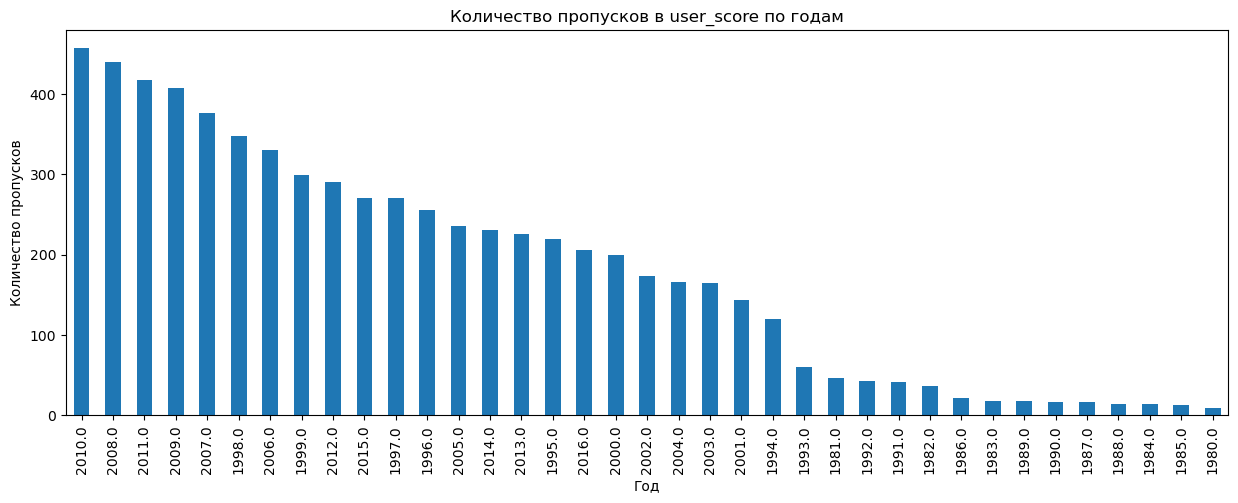

In [21]:
data.query('user_score.isna()')['year_of_release'].value_counts().plot(kind='bar', figsize=(15, 5))
plt.title('Количество пропусков в user_score по годам')
plt.xlabel('Год')
plt.ylabel('Количество пропусков')
plt.show()

Пропуски в оценках есть для игр всех лет. Скорее всего, для этих игр просто отсутствуют данные в источнике с оценками (игра может быть слишком старой или непопулярной, поэтому не оцениваться пользователями).

Пропусков слишком много (40%), чтобы их удалять. Заполнять их каким-либо методом тоже ненадежно, поэтому просто оставим их.

Кроме пропущенных значений в столбце есть значение 'tbd'.

In [22]:
data.query('user_score == "tbd"')['user_score'].count()

2376

In [23]:
data.query('user_score == "tbd"').head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Возможно, по этим играм есть пользовательские оценки, но мало, и система пока не выдает среднюю оценку пользователей и ждет, когда накопится больше отзывов.

<a id='user_score_tbd'></a>Этих значений тоже много, поэтому их, как и пропуски, не будем удалять. Оставлять как есть тоже не хотим, т.к. из-за этих значений тип всего столбца - object.

Заменим их на NaN. Это можно сделать с помощью ```to_numeric``` с параметром ```errors='coerce'```.

In [24]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [25]:
data.query('user_score == "tbd"')['user_score'].count()

0

In [26]:
data.loc[[119, 301, 520],:]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,NaN,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,NaN,T


In [27]:
data['user_score'].isna().sum()

8981

Заменили значения 'tbd' на NaN. Итоговое количество пропусков в столбце - 8981. Оно совпадает с суммой исходного количества пропусков (6605) и количеством 'tbd' в исходной таблице (2376), значит, других нечисловых значений в столбце не было.

#### Пропущенные значения rating

Посмотрим на пропущенные значения в столбце ```rating```.

In [28]:
data['rating'].isna().sum()

6676

In [29]:
data.query('rating.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Причины пропусков могут быть разными. Возможно, игра слишком старая, и не получила рейтинг, т.к. системы тогда еще не было. Возможно, игра не выходила в NA регионе (у других регионов свои рейтинговые системы - PEGI в Европе и CERO в Японии). Возможно, игре просто не был присвоен ESRB рейтинг, т.к. этот рейтинг не является обязательным: "*The rating system is voluntary, however all console manufacturers as well as certain U.S. retailers and mobile or online storefronts require ESRB ratings for the games or apps they offer.*"

Удалять пропуски не будем, т.к. их слишком много. Можем заменить их на unknown.

In [30]:
data['rating'] = data['rating'].fillna('unknown')

In [31]:
data['rating'].isna().sum()

0

#### Пропущенные значения critic_score

Посмотрим на пропуски в столбце ```critic_score```.

In [32]:
data['critic_score'].isna().sum()

8461

In [33]:
data.query('critic_score.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown


Как и в случае с ```user_score```, скорее всего пропуски означают, что для этих игр информации по оценкам нет. Оставим пропуски в столбце.

#### Пропущенные значения - итог

Обработали пропущенные значения в столбцах датафрейма:
+ ```name``` - удалили строки с пропущенными значениями
+ ```genre``` - удалили строки с пропущенными значениями
+ ```year_of_release``` - удалили строки с пропущенными значениями
+ ```rating``` - заменили пропущенные значения значением "unknown"
+ ```critic_score``` - оставили пропущенные значения
+ ```user_score``` - оставили пропущенные значения. Значения "tbd" заменили на NaN, чтобы столбец имел числовой тип

In [34]:
(data
 .isna()
 .agg(['sum', 'mean'])
 .transpose()
 .sort_values(by='mean', ascending=False)
 .style.format({'sum':'{:.0f}', 'mean': '{:.2%}'})
)

,sum,mean
user_score,8981,54.62%
critic_score,8461,51.45%
name,0,0.00%
platform,0,0.00%
year_of_release,0,0.00%
genre,0,0.00%
na_sales,0,0.00%
eu_sales,0,0.00%
jp_sales,0,0.00%
other_sales,0,0.00%


Проверим, какой процент строк остался в таблице после удаления строк с пропусками.

In [35]:
"{0:.2%}".format(data.shape[0] / data_size_orig[0])

'98.38%'

Всё ОК, потеряли менее 2% данных.

### Преобразования типов

Преобразуем типы данных в датафрейме.

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 2.0+ MB


Тип данных ```user_score``` был преобразован из object в float в процессе [замены значений tbd на NaN](#user_score_tbd).

Приведем столбец ```year_of_release``` к типу int.

In [37]:
data['year_of_release'] = data['year_of_release'].astype('int')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.9+ MB


### Проверка на наличие дубликатов

Проверим, что таблица не содержит дубликатов.

In [39]:
data.duplicated().sum()

0

Дубликатов не обнаружено.

<a id='fixes_implicit_duplicates'></a>Проверим наличие неявных дубликатов.

In [40]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Есть две записи для одной и той же игры. Посмотрим на них.

In [41]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [42]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


В дубликате отличаются продажи по регионам. Добавим продажи из строки-дубликата в основную строку, затем удалим дубликат.

In [43]:
data.loc[604, 'eu_sales'] += data.loc[16230, 'eu_sales']

In [44]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [45]:
data.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


In [46]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

Удалили неявные дубликаты, совпадающие по названию, платформе и году релиза одновременно.

### Добавление столбца с суммарными продажами

Добавим столбец ```total_sales```, содержащий суммарные продажи во всех регионах.

In [47]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [48]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Предобработка данных - итог

Провели предобработку данных.
1. Переименовали столбцы - привели названия к нижнему регистру
2. Обработали пропуски в столбцах:
    + ```name``` - удалили строки с пропущенными значениями
    + ```genre``` - удалили строки с пропущенными значениями
    + ```year_of_release``` - удалили строки с пропущенными значениями
    + ```rating``` - заменили пропущенные значения значением "unknown"
    + ```critic_score``` - оставили пропущенные значения
    + ```user_score``` - оставили пропущенные значения. Значения "tbd" заменили на NaN, чтобы столбец имел числовой тип
3. Преобразовали типы данных в столбцах:
    + ```user_score``` - преобразовали из object в float
    + ```year_of_release``` - преобразовали из float в int
4. Проверили данные на наличие дубликатов. Явных дубликатов не обнаружено, обнаружен один дубликат, совпадающий по названию, платформе и году релиза - данные о продажах из строки-дубликата были добавлены в основную строку, дубликат удален.
5. Добавили столбец ```total_sales```, содержащий суммарные продажи во всех регионах.

## Исследовательский анализ данных

### Количество выпущенных игр по годам

Проанализируем количество выпущенных в разные годы игр.

In [49]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

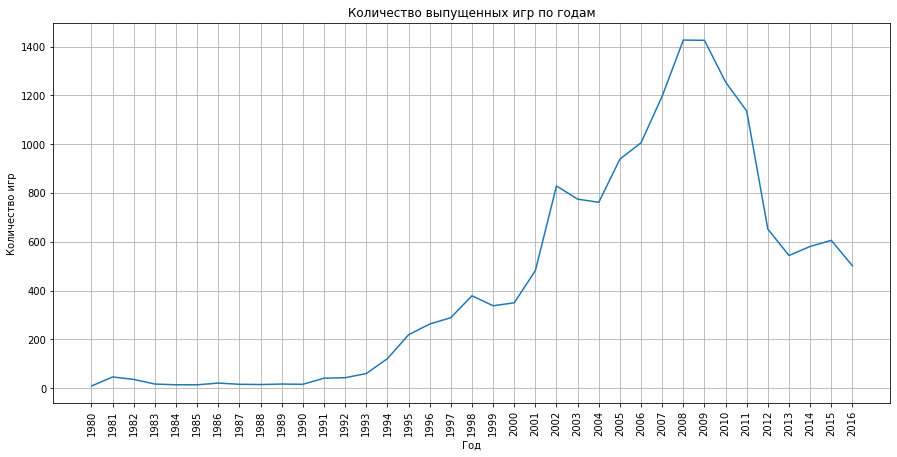

In [49]:
data.groupby('year_of_release')['name'].count().plot(grid=True, figsize=(15, 7))
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(np.arange(1980, 2017, 1), rotation=90)
plt.show()

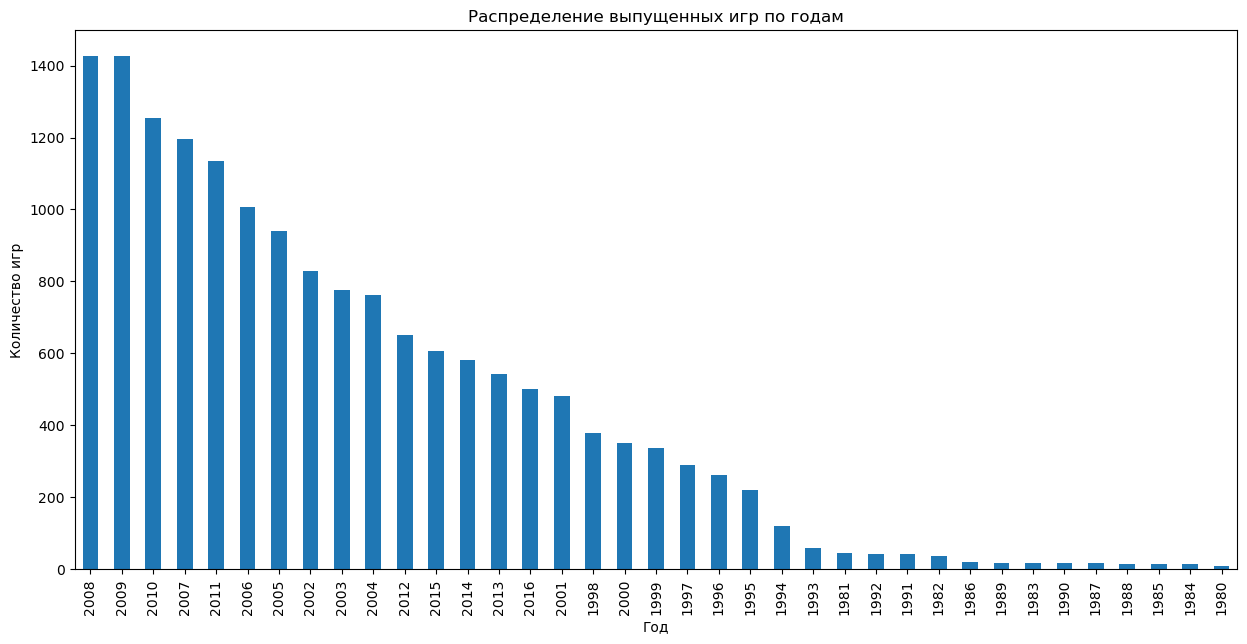

In [50]:
data['year_of_release'].value_counts().plot(kind='bar', figsize=(15, 7))
plt.title('Распределение выпущенных игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [51]:
data['year_of_release'].value_counts().head(20)

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
Name: count, dtype: int64

**Выводы:**

В таблице есть данные за период с 1980 по 2016 год.

Пик количества выпущенных за год игр приходится на 2008-2009 годы. После 2009 года количество выпущенных игр начинает снижаться.

Больше всего игр было выпущено в период с 2002 по 2011 год.

### Продажи игр по платформам

Посмотрим, как менялись продажи по платформам.

Найдем платформы с наибольшими суммарными продажами.

In [52]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

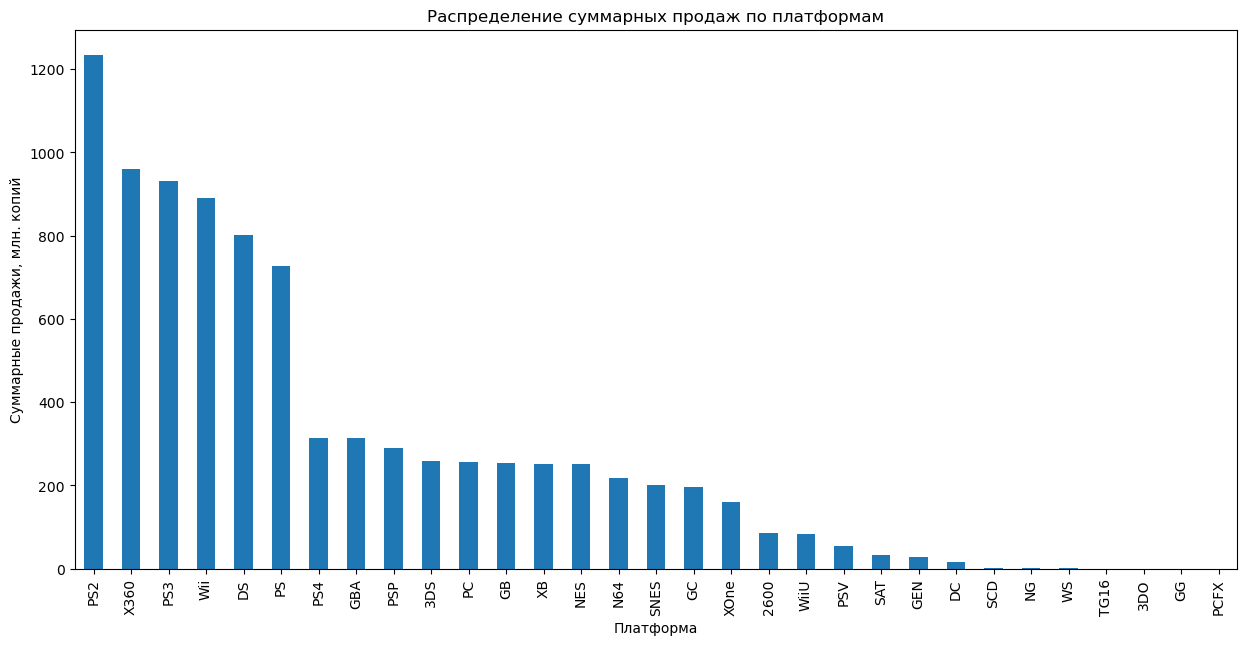

In [53]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 7))
plt.title('Распределение суммарных продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

Лидирует по продажам PS2. 

Топ-6 платформ:
+ PS2     (1233.56)
+ X360     (961.24)
+ PS3      (931.34)
+ Wii      (891.18)
+ DS       (802.78)
+ PS       (727.58)

В топ-10 также попадают
+ PS4      (314.14)
+ GBA      (312.88)
+ PSP      (289.53)
+ 3DS      (257.81)

При этом места с 7 и ниже значительно отстают от топ-6, а между собой уже различаются не так сильно. Так, PC на 11 месте отстает от 10-го места (3DS) на 2 млн. проданных копий игр, в то время как PS4 на 7 месте отстает от PS на 6 месте на 413.5 млн. копий.

Посмотрим на распределение продаж по годам для самых популярных платформ.

В таблице есть только дата выпуска игры, поэтому формально графики отображают количество продаж относительно года выхода игр, а не относительно года продажи. Игру, выпущенную в 2005 году, могли купить и в 2010. Но можно считать, что основной объем продаж приходится на год выхода игры.

In [54]:
top10_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).keys()

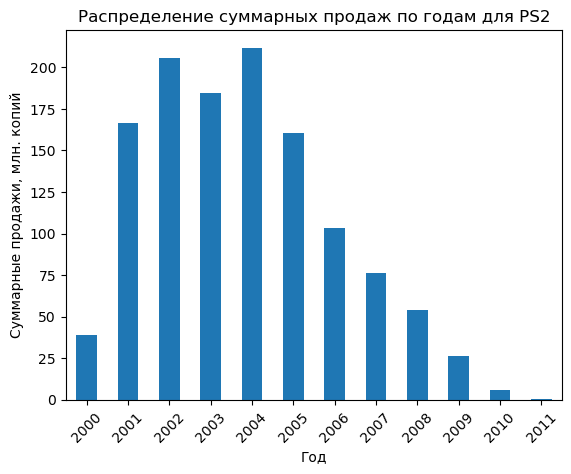

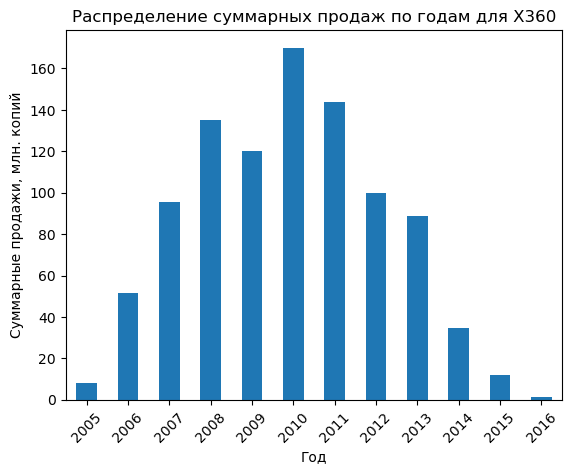

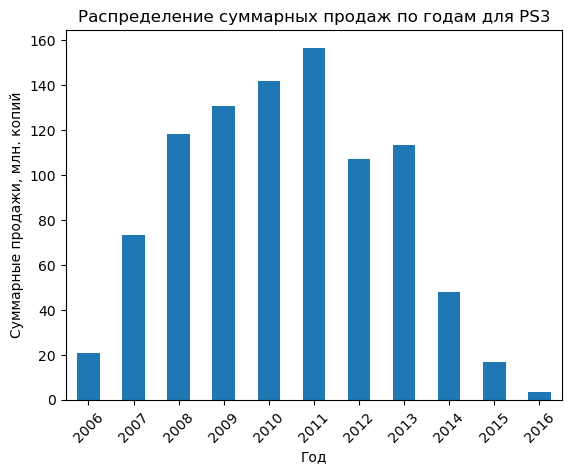

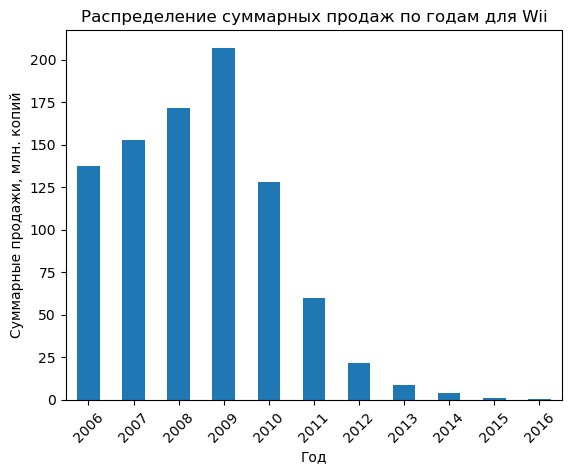

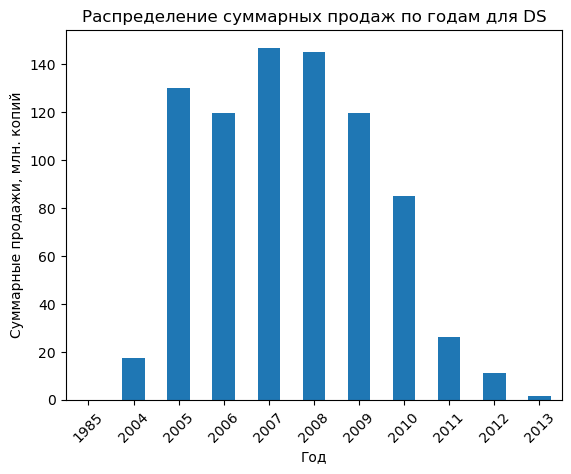

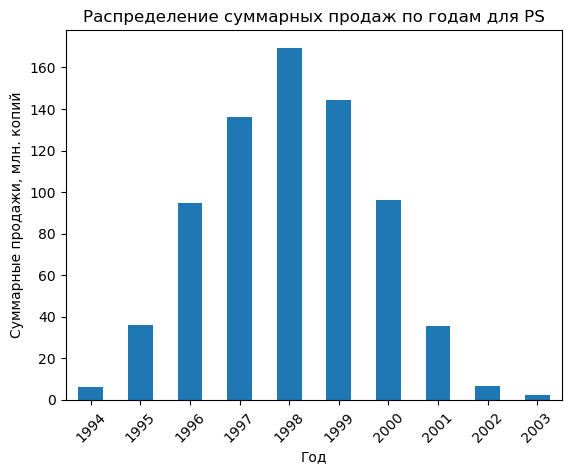

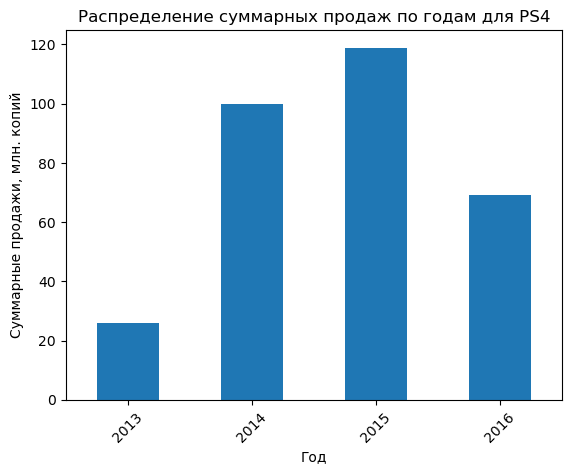

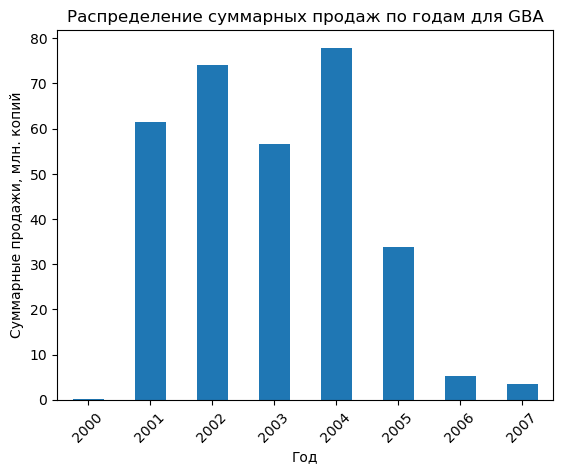

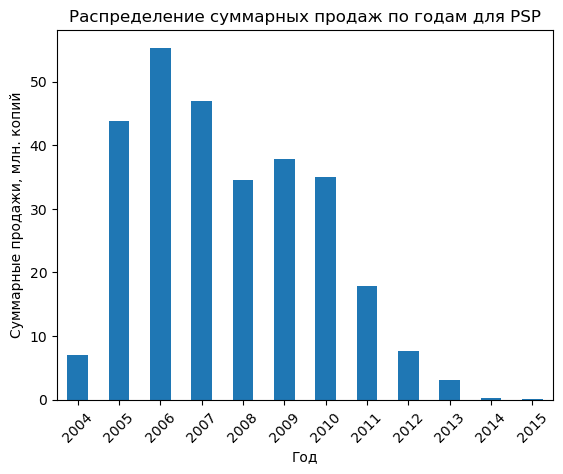

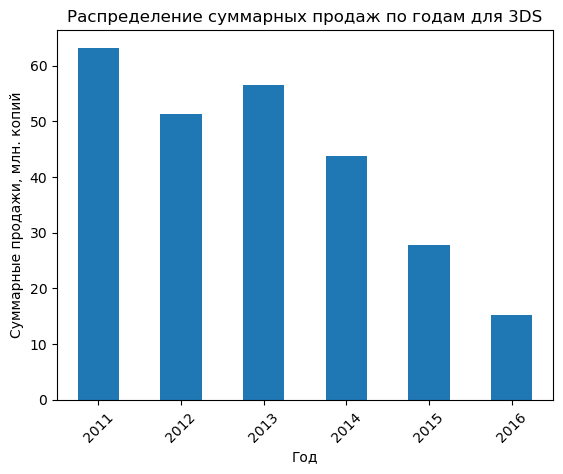

In [56]:
for platform in top10_platforms:
    data.query('platform == @platform').groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
    plt.title('Распределение суммарных продаж по годам для ' + platform)
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи, млн. копий')
    plt.xticks(rotation=45)
    plt.show()

В диаграмме для DS видим 1985 год. Это явно ошибка, т.к. консоль вышла в 2004 году. Посмотрим на ошибочные строки.

In [57]:
data.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


Это игра Strongest Tokyo University Shogi DS (最強 東大将棋DS), которая вышла в 2007 году. Исправим год.

In [58]:
data.loc[15957, 'year_of_release'] = 2007

Построим график для DS еще раз.

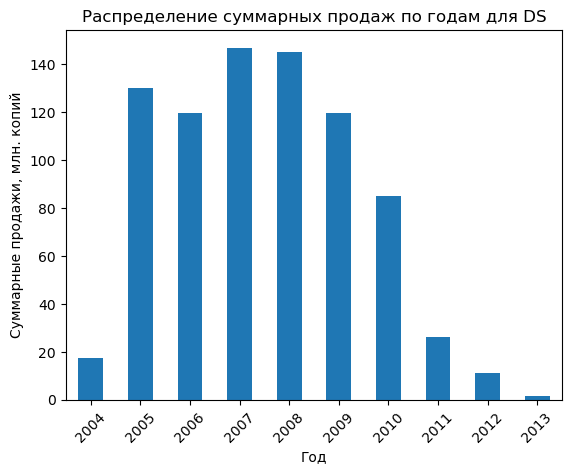

In [60]:
data.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
plt.title('Распределение суммарных продаж по годам для DS')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xticks(rotation=45)
plt.show()

Определить характерный срок, за который появляются новые и исчезают старые платформы можно, например, посмотрев на количество выпущенных игр по годам.

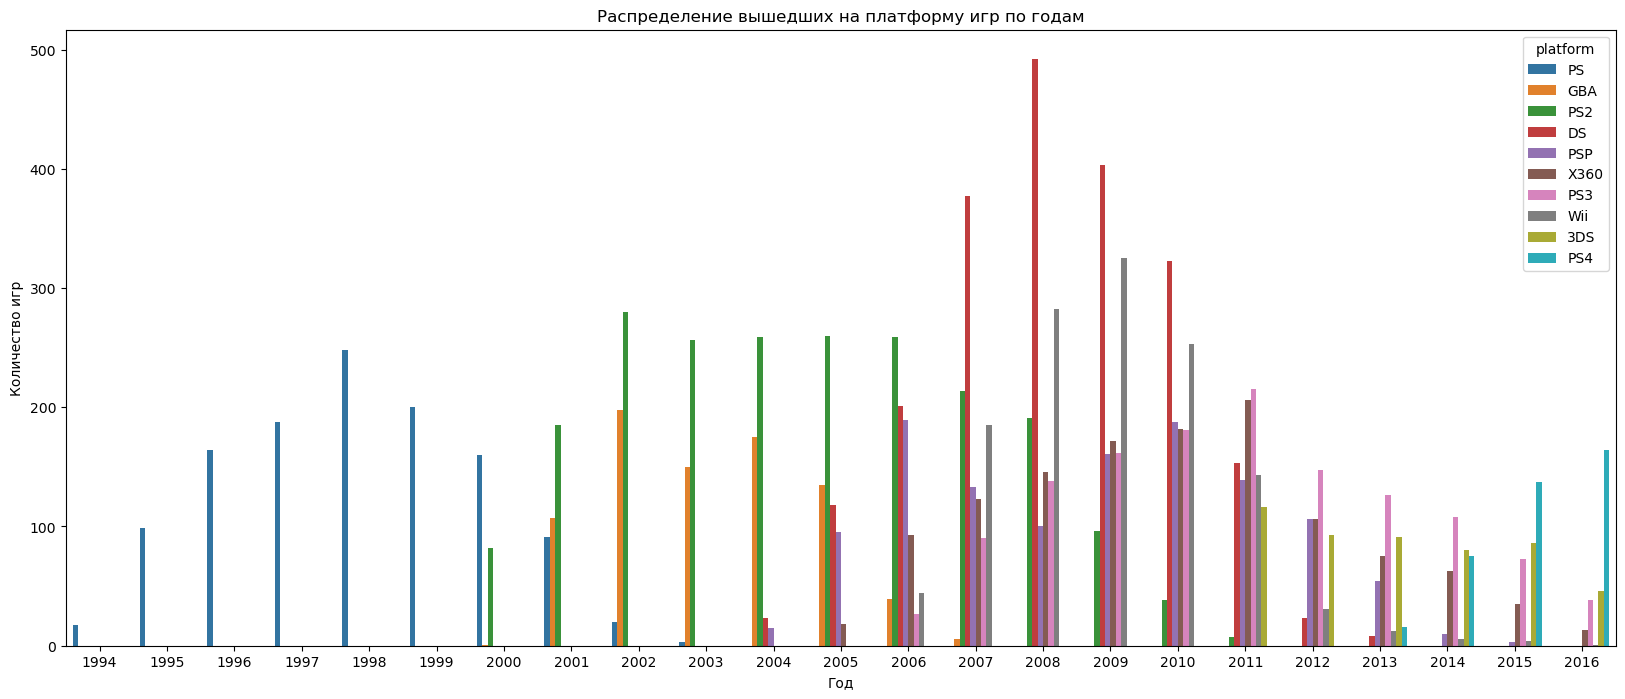

In [61]:
plt.figure(figsize=(20, 8))
sns.barplot(
    data=(data
          .query('platform in @top10_platforms')
          .groupby(['platform', 'year_of_release'])['year_of_release']
          .count()
          .reset_index(name='count')
         ),
    x='year_of_release',
    y='count', 
    hue='platform'
)
plt.title('Распределение вышедших на платформу игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

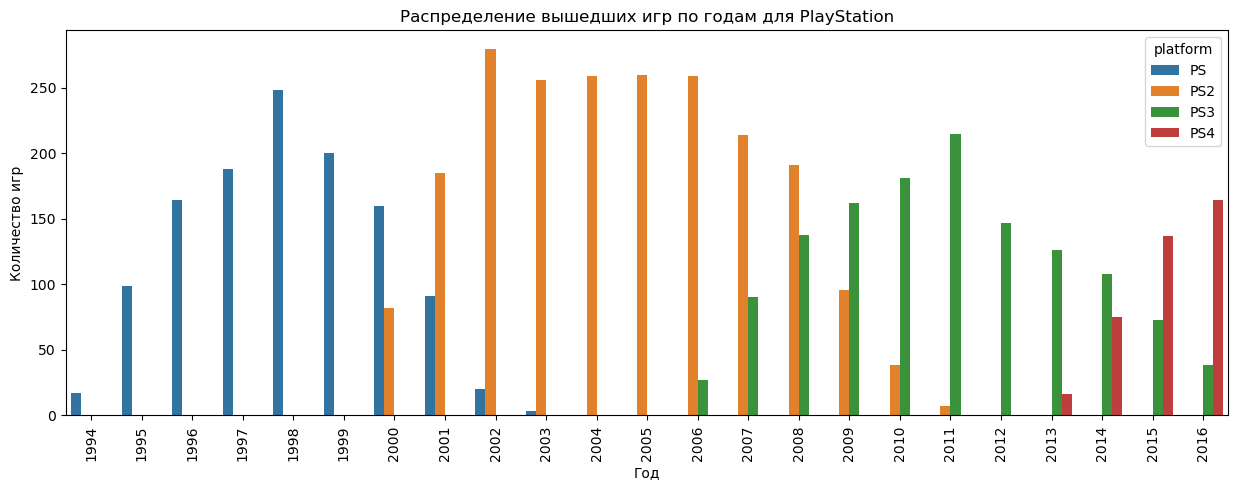

In [62]:
plt.figure(figsize=(15, 5))
sns.barplot(
    data=(data
          .query('platform in ["PS", "PS2", "PS3", "PS4"]')
          .groupby(['platform', 'year_of_release'])['year_of_release']
          .count()
          .reset_index(name='count')
         ), 
    x='year_of_release', 
    y='count', 
    hue='platform'
)
plt.title('Распределение вышедших игр по годам для PlayStation')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)
plt.show()

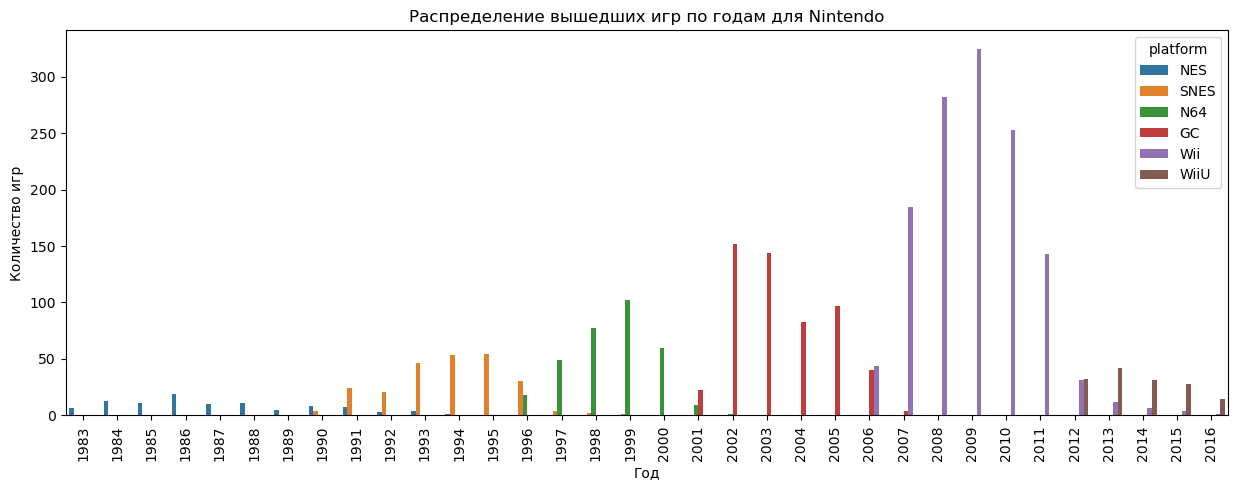

In [63]:
plt.figure(figsize=(15, 5))
sns.barplot(data=(data
          .query('platform in ["NES", "SNES", "N64", "GC", "Wii", "WiiU"]')
          .groupby(['platform', 'year_of_release'])['year_of_release']
          .count()
          .reset_index(name='count')
         ), 
    x='year_of_release', 
    y='count', 
    hue='platform'
)
plt.title('Распределение вышедших игр по годам для Nintendo')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)
plt.show()

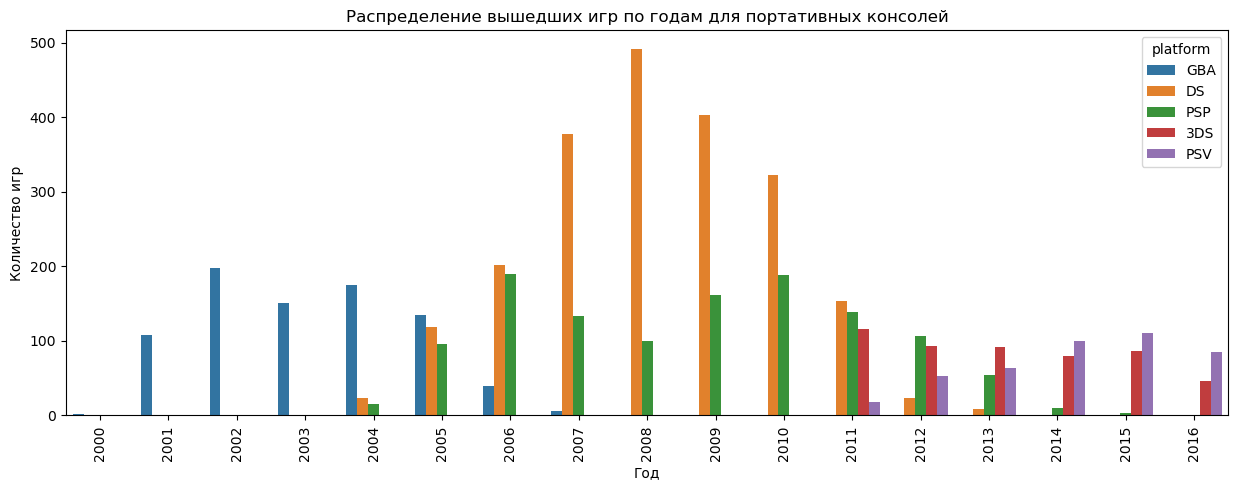

In [64]:
plt.figure(figsize=(15, 5))
sns.barplot(data=(data
          .query('platform in ["PSP", "PSV", "GBA", "DS", "3DS"]')
          .groupby(['platform', 'year_of_release'])['year_of_release']
          .count()
          .reset_index(name='count')
         ), 
    x='year_of_release', 
    y='count',
    hue='platform'
)
plt.title('Распределение вышедших игр по годам для портативных консолей')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.xticks(rotation=90)
plt.show()

На платформу активно выпускаются игры в течение 4-6 лет. 

Характерный срок, за который появляются новые и исчезают старые платформы - 9-10 лет.

Платформы как правило выпускаются "поколениями", то есть к концу жизненного цикла платформы выходит и набирает популярность не только следующая версия этой платформы, но и следующая платформа конкурента (см., например, график для портативных консолей - с выходом DS на спад пошел выход игр на предыдущей версии (GBA) и начала набирать популярность консоль конкурентов (PSP)).

**Выводы:**

Топ-6 платформ по суммарным продажам игр (в скобках - суммарные продажи в млн. копий):
+ PS2 (1233.56)
+ X360 (961.24)
+ PS3 (931.34)
+ Wii (891.18)
+ DS (802.78)
+ PS (727.58)

Места с 7 и ниже значительно отстают от топ-6, а между собой уже различаются не так сильно. 

Средняя "продолжительность жизни" платформы (от выхода платформы до прекращения выпуска игр) - 9-10 лет.

Обычно платформа популярна около 4-6 лет, после чего количество выпускаемых игр начинает заметно снижаться. Как правило, в это время начинает набирать популярность следующее поколение платформ.

<a id='fixes_life_cycle'></a>Посмотрим на среднюю продолжительность жизни платформы.

In [65]:
platform_life = data.groupby('platform').agg(
    release_year=('year_of_release', 'min'),
    eol_year=('year_of_release', 'max'),
    life_cycle=('year_of_release', lambda x: max(x) - min(x) + 1)
).sort_values(by='life_cycle', ascending=False)

<a id='platform_life_table'></a>

In [66]:
platform_life

,release_year,eol_year,life_cycle
platform,,,
PC,1985,2016,32
GB,1988,2001,14
NES,1983,1994,12
X360,2005,2016,12
PSP,2004,2015,12
PS2,2000,2011,12
DC,1998,2008,11
Wii,2006,2016,11
PS3,2006,2016,11


Посчитаем среднюю продолжительность жизни.

In [67]:
platform_life['life_cycle'].mean()

8.0

Посчитаем среднюю продолжительность без учета последнего поколения платформ, т.к. 2016 на самом деле не является для них годом окончания жизненного цикла, значит подсчет жизненного цикла для этих платформ некорректен.

In [68]:
platform_life.query('platform not in ["PC", "PS4", "XOne", "WiiU", "3DS", "PSV"]')['life_cycle'].mean()

7.64

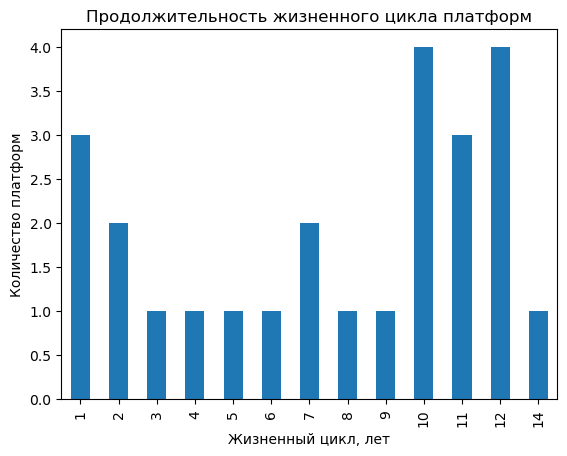

In [69]:
(platform_life.query('platform not in ["PC", "PS4", "XOne", "WiiU", "3DS", "PSV"]')
 .groupby('life_cycle')
 ['life_cycle'].count()
 .plot(kind='bar')
)
plt.title('Продолжительность жизненного цикла платформ')
plt.xlabel('Жизненный цикл, лет')
plt.ylabel('Количество платформ')
plt.show()

Как видно из [таблицы](#platform_life_table), на заре индустрии выходило много платформ, которые жили 1-2 года.

Посмотрим на среднее по более актуальным платформам, например, начиная с шестого поколения (стартом шестого поколения считается 1998 год).

In [70]:
(platform_life.query('platform not in ["PC", "PS4", "XOne", "WiiU", "3DS", "PSV"] and release_year > 1997')
 ['life_cycle'].mean()
)

9.636363636363637

Таким образом, жизненный цикл современных платформ в среднем - 8-10 лет. Если платформа успешна, игры могут выпускаться на нее дольше (см, например, PS2 - 12 лет, или X360 - минимум 12 лет), а если платформа не стала популярной - цикл может быть короче (например, GameCube - 7 лет, или Sega Saturn - 6).

### Выбор актуального периода

Выберем актуальный период для построения прогнозов на 2017 год.

В качестве актуального периода предлагается брать данные с 2012 по 2016 год:
+ Исследование затронет актуальные платформы, т.к. пик популярности платформ, как мы выяснили, в районе 5 лет, а жизненный цикл - около 10. 
+ Многие источники считают 2012 началом периода 8-го поколения консолей (хотя в 2012 вышла только WiiU, а XOne и PS4 - в 2013).

In [71]:
data_actual = data.query('year_of_release > 2011').reset_index(drop=True)

In [72]:
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [73]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2885 entries, 0 to 2884
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int32  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 259.3+ KB


### Лидирующие платформы за актуальный период

Посмотрим, какие платформы лидируют по суммарным продажам за актуальный период.

In [74]:
(data_actual
 .groupby('platform')
 .agg(
     total_sales=('total_sales', 'sum'), 
     percentage=('total_sales', lambda x: sum(x)/sum(data_actual['total_sales']))
 )
 .sort_values(by='total_sales', ascending=False)
 .style.format({'percentage': '{:.2%}'})
)

,total_sales,percentage
platform,,
PS4,314.140000,21.72%
PS3,288.790000,19.96%
X360,236.540000,16.35%
3DS,194.610000,13.45%
XOne,159.320000,11.01%
WiiU,82.190000,5.68%
PC,62.650000,4.33%
PSV,49.180000,3.40%
Wii,35.370000,2.45%


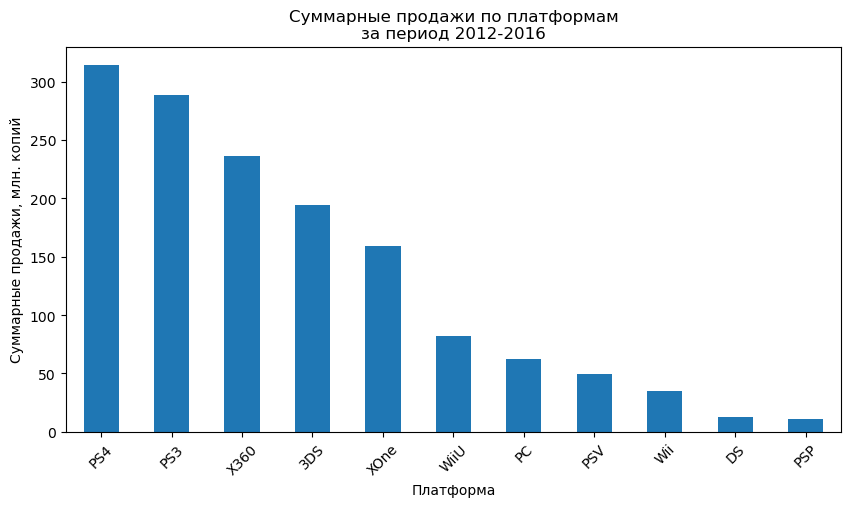

In [76]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи по платформам\nза период 2012-2016')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.xticks(rotation=45)
plt.show()

По суммарному количеству продаж за 5 лет лидирует PS4.

Видим топ-5 платформ (PS4, PS3, X360, 3DS, XOne). Суммарные продажи на этих платформах составляют 82.5% от всех продаж за актуальный период.

Посмотрим на динамику продаж по годам.

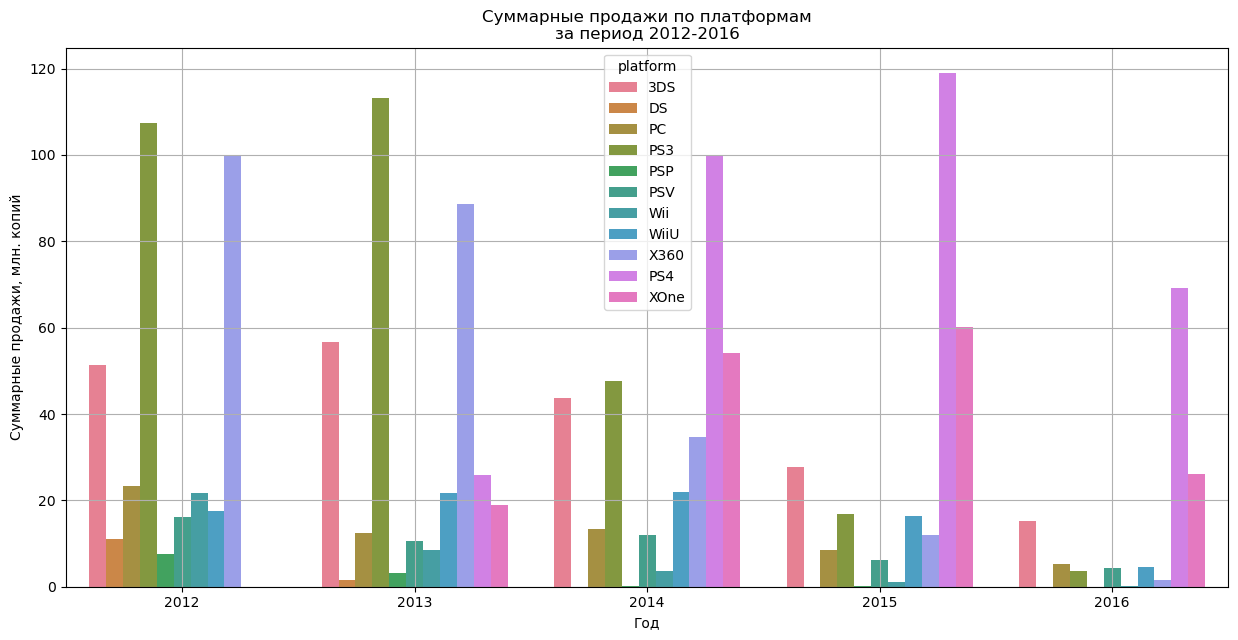

In [77]:
plt.figure(figsize=(15, 7))
sns.barplot(
    data=data_actual.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index(name='sales'), 
    x='year_of_release', 
    y='sales', 
    hue='platform'
)
plt.grid(True)
plt.title('Суммарные продажи по платформам\nза период 2012-2016')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

+ Популярность PS3 и X360 снижается, на смену этим платформам приходит следующее поколение.
+ Популярность PS4 и XOne растет, не считая 2016 года, но за 2016 год могут быть неполные данные, т.к. это текущий год. Эти платформы можно считать потенциально прибыльными.
+ Популярность остальных платформ постепенно уменьшается. Это консоли предыдущего поколения и PC. Они замещаются следующими поколениями и, вероятно, мобильными устройствами, данных по которым у нас нет.

Посмотрим на размах данных по продажам на каждой платформе за актуальный период.

In [78]:
data_actual.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,492.0,0.586972,1.464141,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


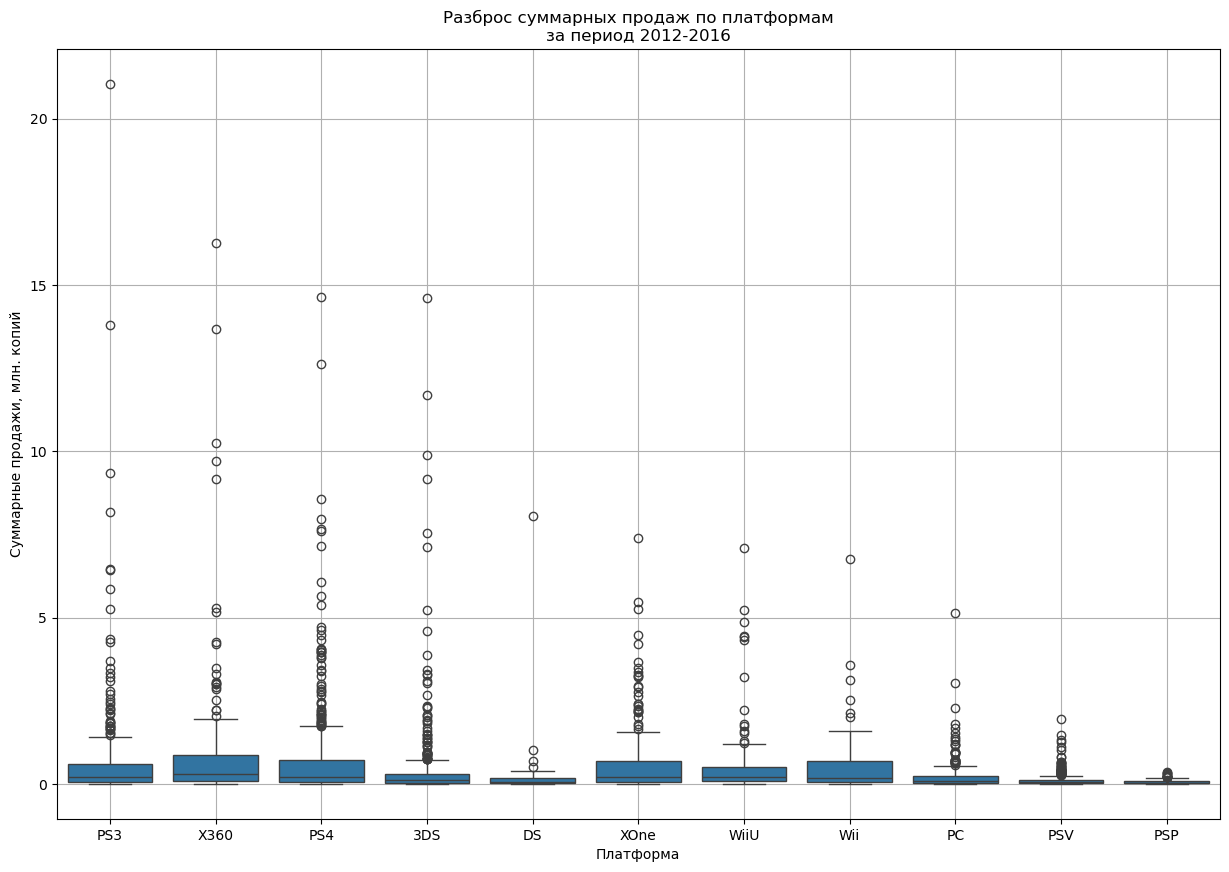

In [79]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    data=data_actual,
    x='platform',
    y='total_sales',
)
plt.grid(True)
plt.title('Разброс суммарных продаж по платформам\nза период 2012-2016')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

На графике много выбросов, которые мешают нормальному отображению межквартильного разброса.

<a id='fixes_skewed_distr'></a>Такое количество выбросов, вероятно, связано с тем, что выпускается очень большое количество игр, большинство из них имеет скромные показатели продаж, но есть некоторое количество "взлетевших" игр-хитов, имеющих аномально большие суммарные продажи.

Посмотрим на распределение продаж для нескольких платформ.

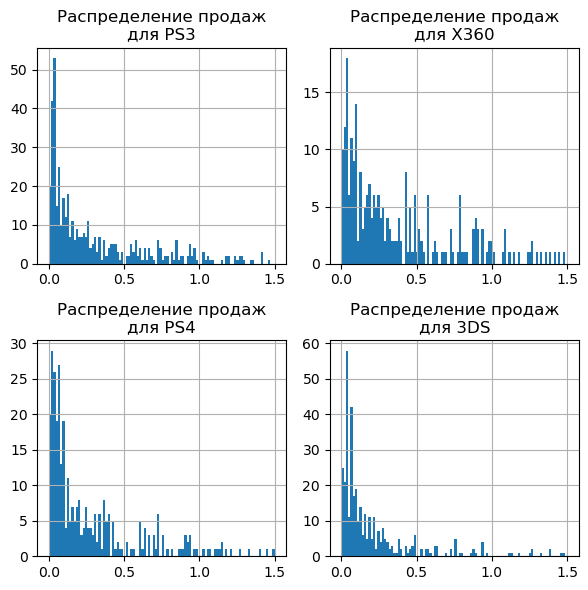

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
for i, platform in enumerate(['PS3', 'X360', 'PS4', '3DS']):
    data_actual.query('platform == @platform')['total_sales'].hist(
        bins=100, 
        range=(0, 1.5), 
        ax=axs[0+i//2, 0+i%2]
    )
    axs[0+i//2, 0+i%2].set_title('Распределение продаж\nдля ' + platform)
fig.tight_layout()
plt.show()

Видим, что у нас ассиметричное распределение, скошенное вправо (в принципе, это видно и на боксплоте - на правую скошенность указывает медиана, близкая к первому квартилю и длинный верхний "ус"). То есть большинство игр имеет небольшие продажи, но есть "хвост" из крайне популярных игр.

In [81]:
data_actual.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Вот эти выбросы - особо популярные игры вроде GTA, Pokemon и Call of Duty.

Ограничим диапазон графика по y.

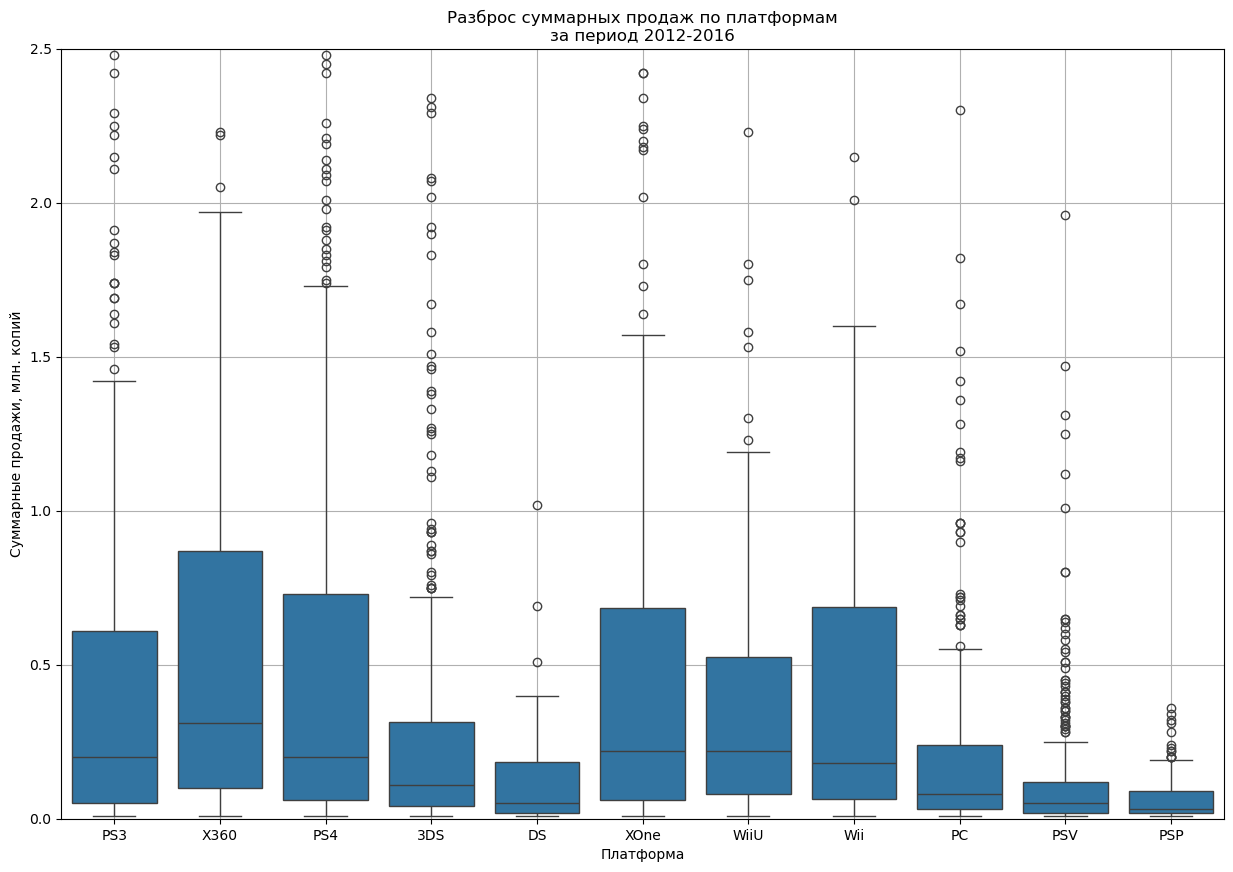

In [82]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    data=data_actual,
    x='platform',
    y='total_sales'
)
plt.grid(True)
plt.ylim([0, 2.5])
plt.title('Разброс суммарных продаж по платформам\nза период 2012-2016')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

Самое высокое медианное значение у X360 - 0.31 млн. копий. Также продажи на платформе X360 имеют самый большой межквартильный размах (0.77 млн. копий).

Самое низкое медианное значение у PSP - 0.03 (впрочем, стоит учитывать, что жизненный цикл этой платформы в рассматриваемый период подходил к концу).

Распределения для всех платформ ассиметричны (скошены вправо). Получаем большой "хвост" из аномально популярных игр.

### Влияние отзывов на продажи

Рассмотрим, как влияют отзывы на продажи. Возьмем самую популярную за актуальный период платформу - PS4.

In [83]:
data_actual.query('platform == "PS4"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


Для начала проверим зависимость продаж от отзывов критиков.

In [84]:
('Пропусков в critic_score: {:.2%} из {} записей'
         .format(
             data_actual.query('platform == "PS4"')['critic_score'].isna().mean(), 
             data_actual.query('platform == "PS4"').shape[0]
         )
)

'Пропусков в critic_score: 35.71% из 392 записей'

Стоит иметь в виду, что выборка небольшая и для трети игр на платформе за актуальный период у нас нет данных об оценке критиков.

<a id='fixes_corr_ps4_label'></a>Построим диаграмму рассеяния.

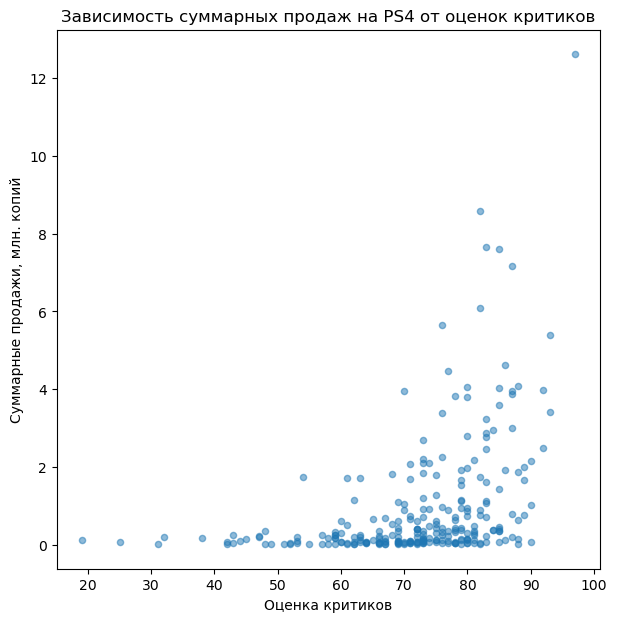

In [85]:
data_actual.query('platform == "PS4"').plot(
    x='critic_score', 
    y='total_sales',
    kind='scatter', 
    alpha=0.5, 
    figsize=(7, 7)
)
plt.title('Зависимость суммарных продаж на PS4 от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

Наблюдаем тенденцию увеличения продаж с увеличением оценки критика.

Посчитаем коэффициент корреляции.

In [86]:
data_actual.query('platform == "PS4"')['total_sales'].corr(data_actual.query('platform == "PS4"')['critic_score'])

0.406567902061781

Коэффициент корреляции подтверждает, что связь есть.

Проверим зависимость количества продаж от отзывов пользователей.

In [87]:
('Пропусков в user_score: {:.2%} из {} записей'
         .format(
             data_actual.query('platform == "PS4"')['user_score'].isna().mean(), 
             data_actual.query('platform == "PS4"').shape[0]
         )
)

'Пропусков в user_score: 34.44% из 392 записей'

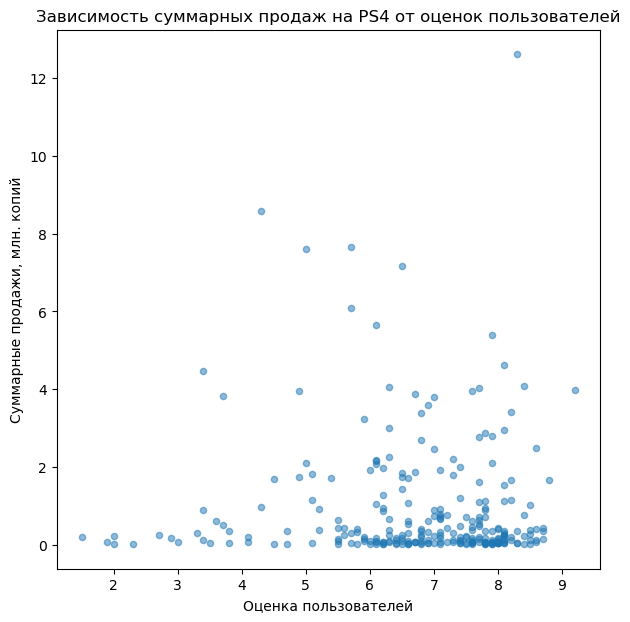

In [88]:
data_actual.query('platform == "PS4"').plot(
    x='user_score', 
    y='total_sales',
    kind='scatter', 
    alpha=0.5, 
    figsize=(7, 7)
)
plt.title('Зависимость суммарных продаж на PS4 от оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

In [89]:
data_actual.query('platform == "PS4"')['total_sales'].corr(data_actual.query('platform == "PS4"')['user_score'])

-0.031957110204556424

Связь между объемом продаж и оценкой пользователей не просматривается.

Таким образом, у игр на PS4 с высокими оценками критиков чаще высокие продажи. От оценок пользователей продажи не зависят.

Соотнесем полученные для PS4 выводы с результатами на остальных платформах.

Рассматривать будем релевантные платформы, еще не совсем закончившие жизненный цикл.

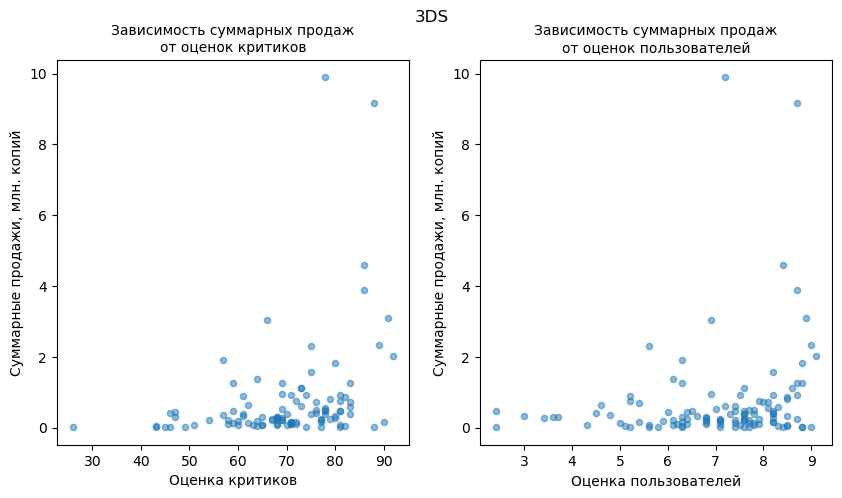

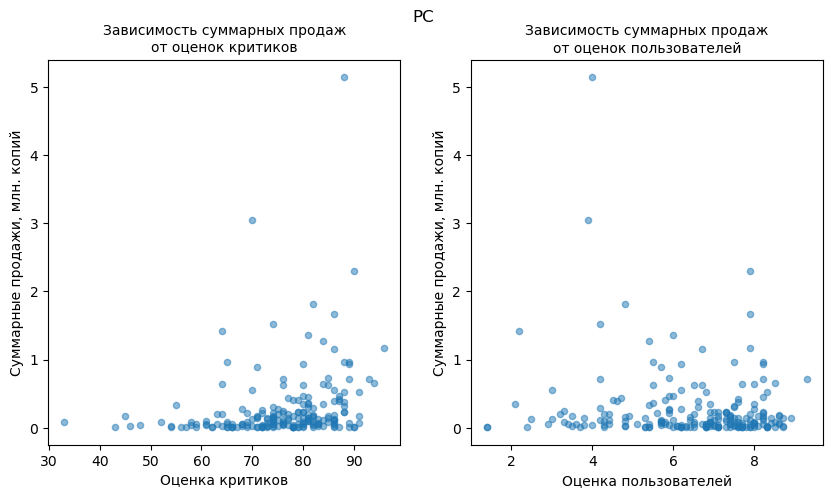

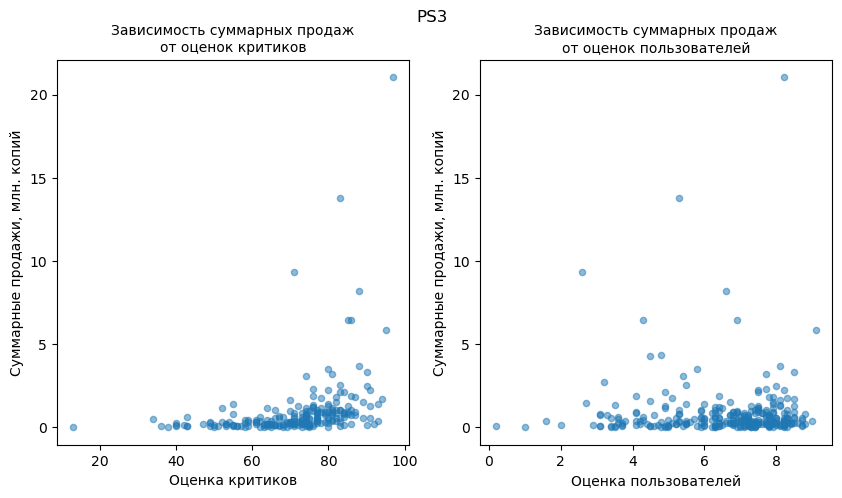

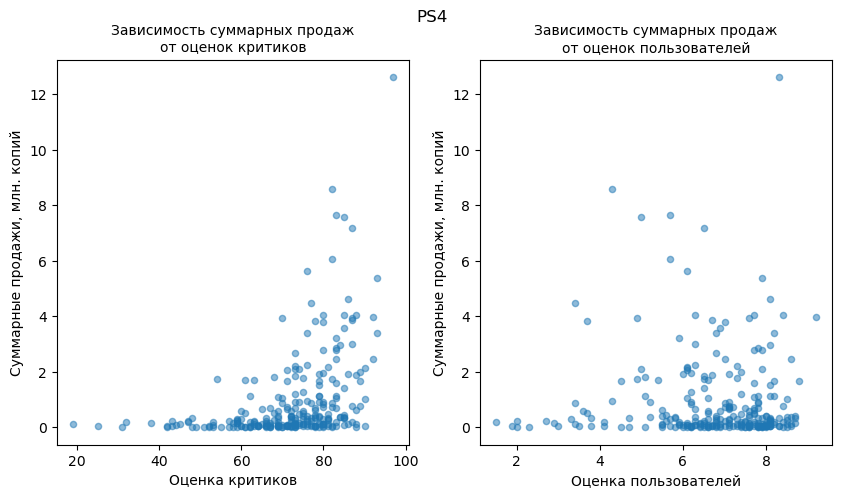

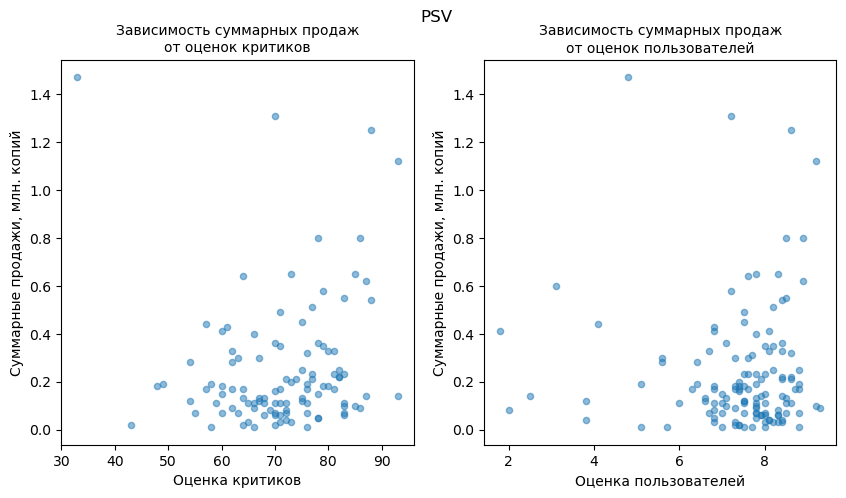

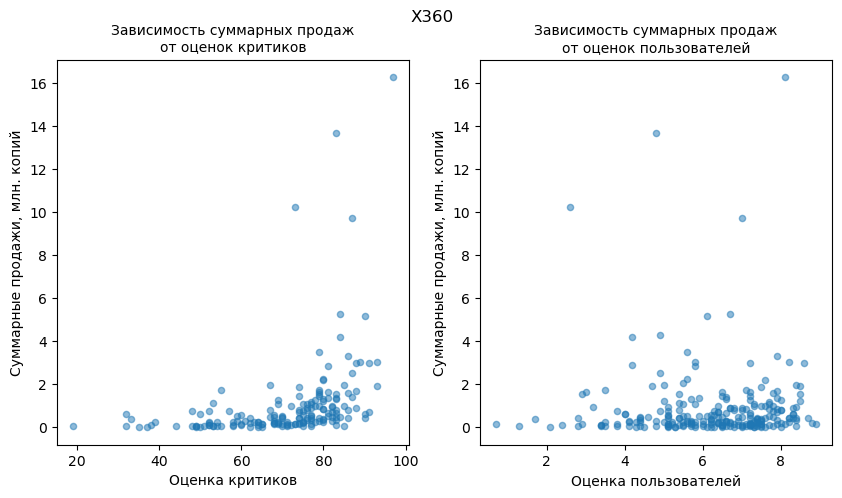

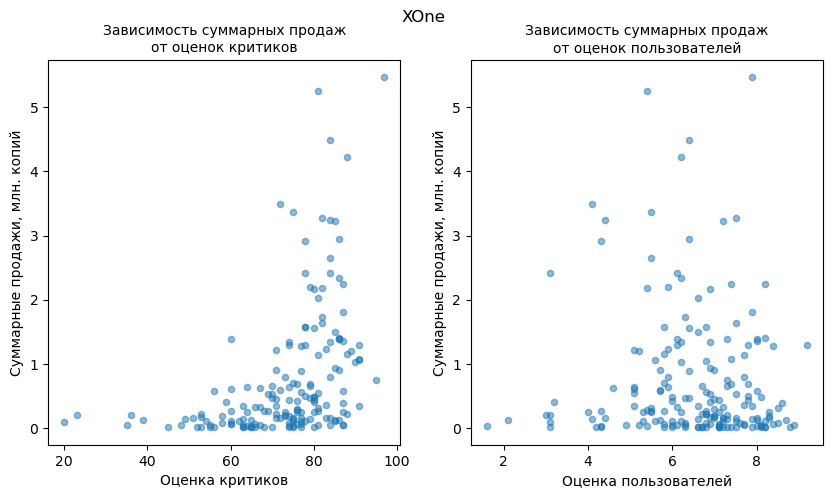

In [90]:
for platform in ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'X360', 'XOne']:
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 5))
    (data_actual
     .query('platform == @platform')
     .plot(
        x='critic_score', 
        y='total_sales',
        kind='scatter', 
        alpha=0.5,
        ax=ax1
     )
    )
    (data_actual
     .query('platform == @platform')
     .plot(
        x='user_score', 
        y='total_sales',
        kind='scatter', 
        alpha=0.5, 
        ax=ax2
     )
    )
    ax1.set_title('Зависимость суммарных продаж\nот оценок критиков', fontsize=10)
    ax2.set_title('Зависимость суммарных продаж\nот оценок пользователей', fontsize=10)
    ax1.set_xlabel('Оценка критиков')
    ax1.set_ylabel('Суммарные продажи, млн. копий')
    ax2.set_xlabel('Оценка пользователей')
    ax2.set_ylabel('Суммарные продажи, млн. копий')
    fig.suptitle(platform)
    plt.show()

In [91]:
platforms_corr = []
for platform in ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'X360', 'XOne']:
    row = [platform]
    row.append("{0:.3f}".format(
        data_actual
               .query('platform == @platform')['total_sales']
               .corr(data_actual.query('platform == @platform')['critic_score'])
              )
        )
    row.append("{0:.3f}".format(
        data_actual
               .query('platform == @platform')['total_sales']
               .corr(data_actual.query('platform == @platform')['user_score'])
              )
        )
    platforms_corr.append(row)
corr_table = (
    pd.DataFrame(platforms_corr, columns=['Platform', 'Corr critic_score','Corr user_score'])
    .set_index('Platform')
    .sort_values(by='Corr critic_score', ascending=False)
)
corr_table

,Corr critic_score,Corr user_score
Platform,,
XOne,0.417,-0.069
PS4,0.407,-0.032
X360,0.361,0.006
PS3,0.334,-0.006
3DS,0.321,0.198
PC,0.237,-0.122
PSV,0.094,-0.004


В целом тенденция, выявленная при анализе платформы PS4, сохраняется - между продажами и отзывами пользователей связи практически нет, между продажами и оценками критиков - есть небольшая положительная связь.

На PC и PSV самая слабая связь продаж с оценками критиков (но для PSV совсем мало данных).

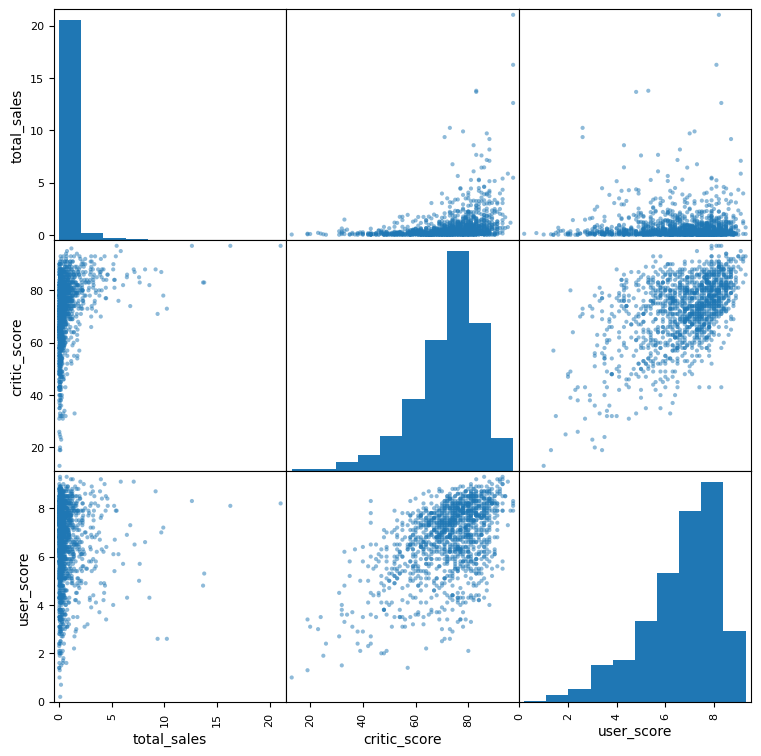

In [92]:
pd.plotting.scatter_matrix(data_actual[['total_sales', 'critic_score', 'user_score']], figsize=(9, 9))
plt.show()

In [93]:
data_actual[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.308636,0.004191
critic_score,0.308636,1.000000,0.518573
user_score,0.004191,0.518573,1.000000


Суммарно по всем платформам получаем аналогичный результат - есть связь между продажами и оценками критиков (коэффициент 0.3) и нет связи между продажами и оценками пользователей.

### Общее распределение игр по жанрам

Посмотрим на количество выпущенных игр по жанрам.

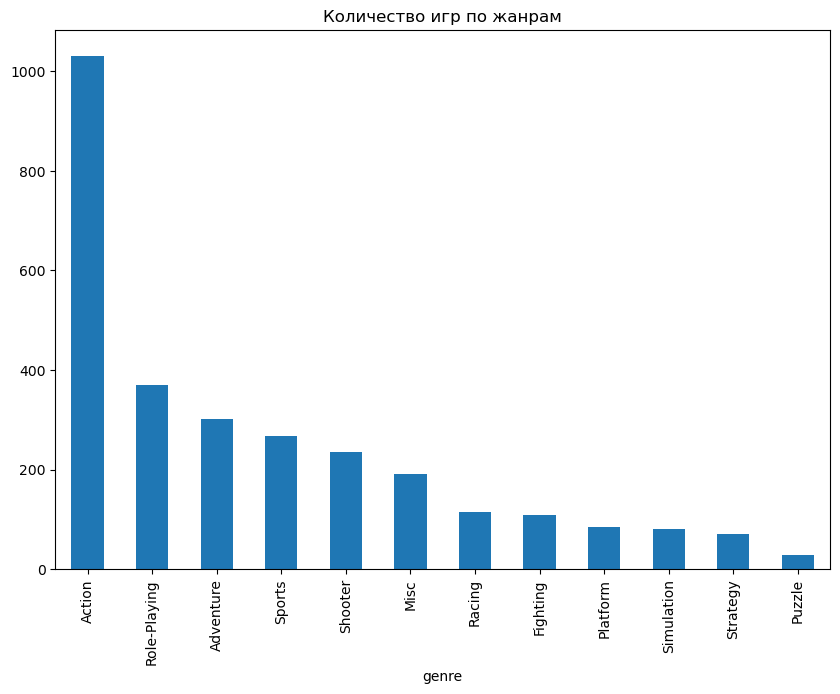

In [99]:
(data_actual['genre']
 .value_counts()
 .plot(kind='bar', figsize=(10, 7))
)
plt.title('Количество игр по жанрам')
plt.ylabel('')
plt.show()

In [100]:
data_actual['genre'].value_counts()

genre
Action          1031
Role-Playing     370
Adventure        302
Sports           267
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64

По количеству выпущенных игр с большим отрывом лидирует жанр Action. Затем идут Role-Playing, Adventure, Sports и Shooter.


Посмотрим на распределение выпущенных игр по жанрам для каждой из актуальных консолей.

Посмотрим на распределение выпущенных игр по жанрам для каждой из актуальных консолей.

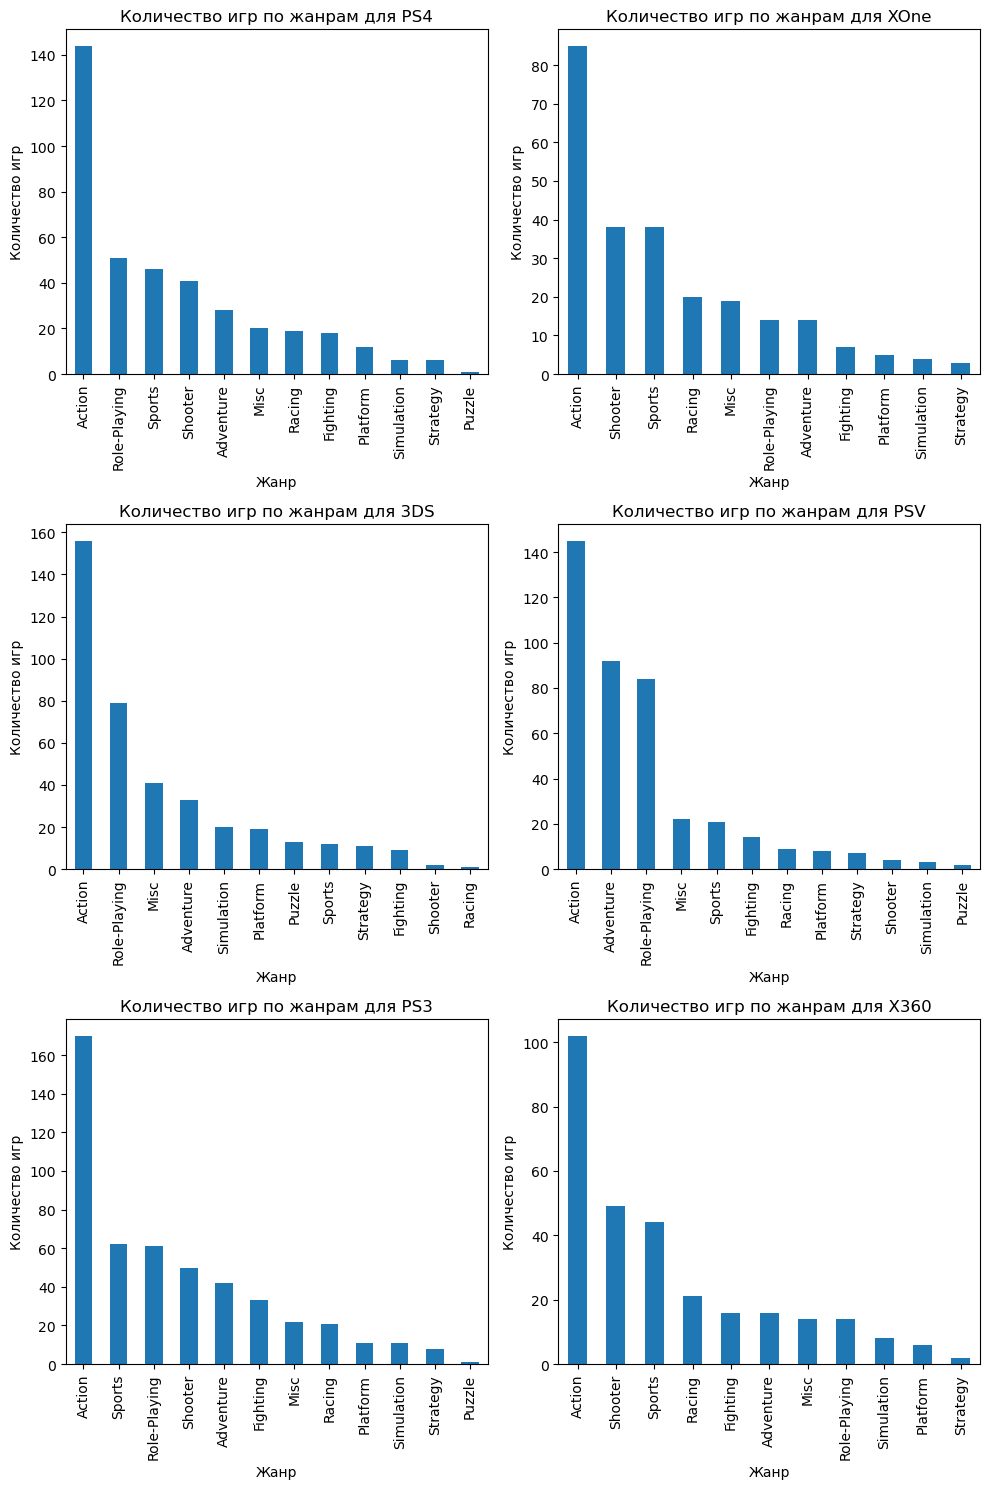

In [102]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))
for i, platform in enumerate(['PS4','PSV', 'PS3', 'XOne', '3DS', 'X360']):
    (data_actual
     .query('platform == @platform')
     ['genre'].value_counts()
     .plot(kind='bar', ax=axs[0+i%3, 0+i%2])
    )
    axs[0+i%3, 0+i%2].set_title('Количество игр по жанрам для ' + platform)
    axs[0+i%3, 0+i%2].set_xlabel('Жанр')
    axs[0+i%3, 0+i%2].set_ylabel('Количество игр')
fig.tight_layout()
plt.show()

Action остается лидером по выпущенным играм для всех консолей. Далее идут различия:
+ На PS4 и PS3 выходило больше игр жанров Role-Playing и Sports, чем Shooter.
+ На XOne и X360  выходило больше Shooter'ов, Role-Playing выходило мало.
+ На портативных платформах (PSV, 3DS) игры жанра Shooter и Sports выходят редко, зато распространены Adventure и Role-Playing.

Посмотрим на количество продаж по жанрам.

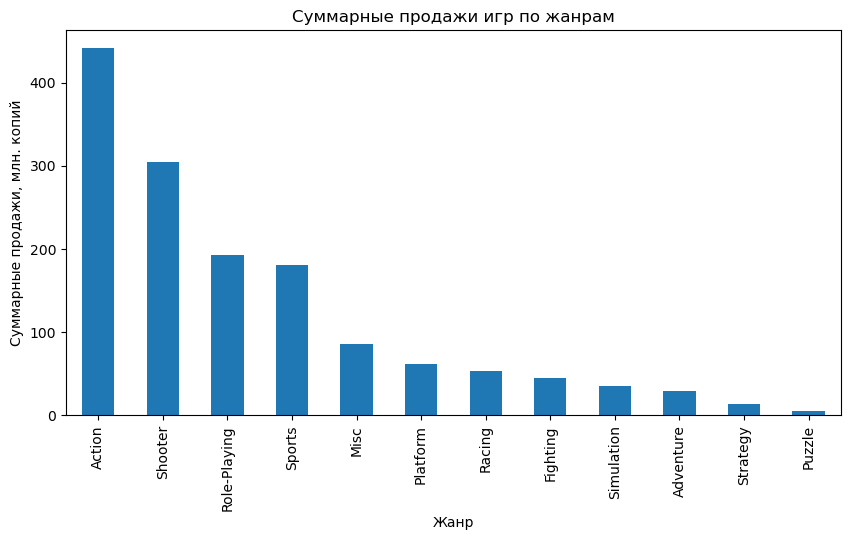

In [103]:
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

In [104]:
data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

По суммарным продажам всё так же лидирует Action. На втором месте по продажам Shooter, затем Role-Playing и Sports.

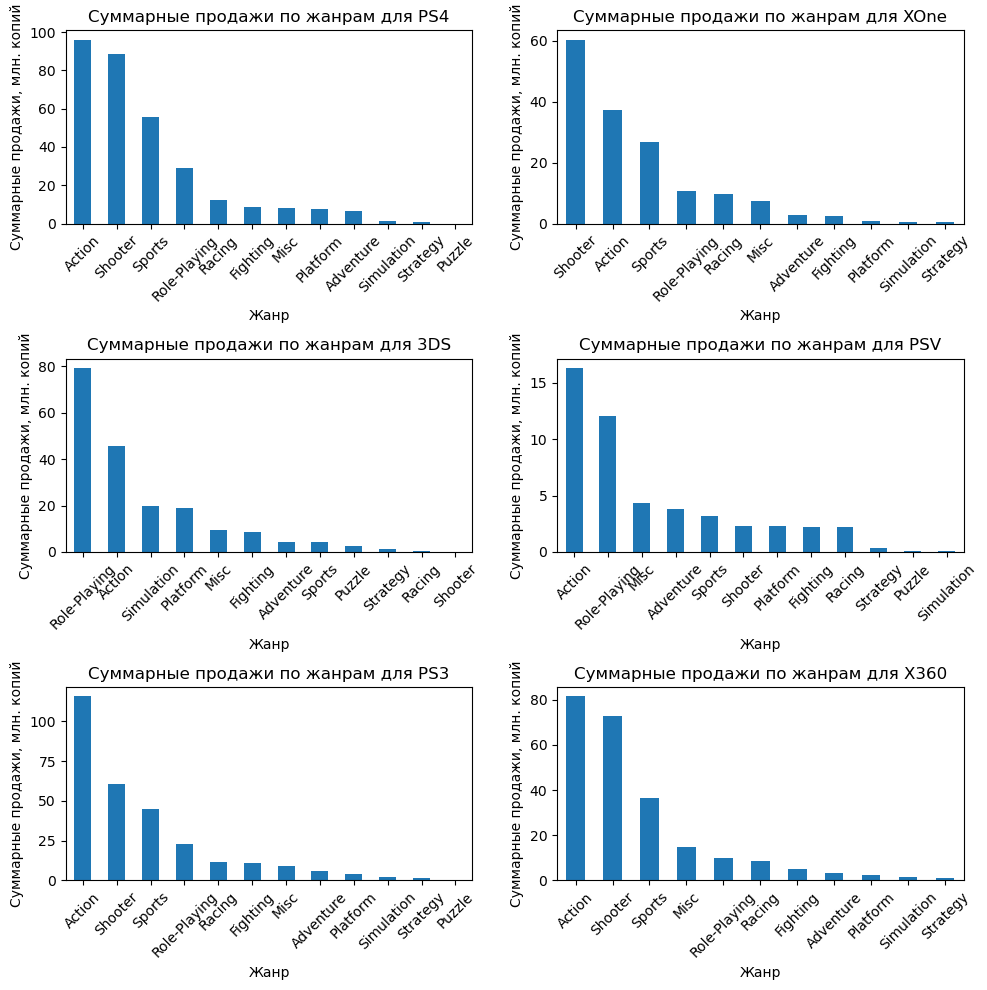

In [105]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
for i, platform in enumerate(['PS4','PSV', 'PS3', 'XOne', '3DS', 'X360']):
    (data_actual
     .query('platform == @platform')
     .groupby('genre')['total_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar', ax=axs[0+i%3, 0+i%2], figsize=(10, 10))
    )
    axs[0+i%3, 0+i%2].set_title('Суммарные продажи по жанрам для ' + platform)
    axs[0+i%3, 0+i%2].set_xlabel('Жанр')
    axs[0+i%3, 0+i%2].set_ylabel('Суммарные продажи, млн. копий')
    axs[0+i%3, 0+i%2].tick_params('x', labelrotation=45)
fig.tight_layout()
plt.show()

Суммарные продажи по жанрам различаются для разных консолей:
+ На PS4, PS3 и X360 лидируют Action, Shooter и Sports
+ На XOne популярнее всего Shooter, далее Action и Sports
+ На портативных платформах популярны Role-Playing, при этом на 3DS они лидируют, а на PSV - на втором месте после Action.
+ На 3DS помимо Action и Shooter условно неплохо продаются Simulation и Platform, а на PSV - Adventure и Sports.

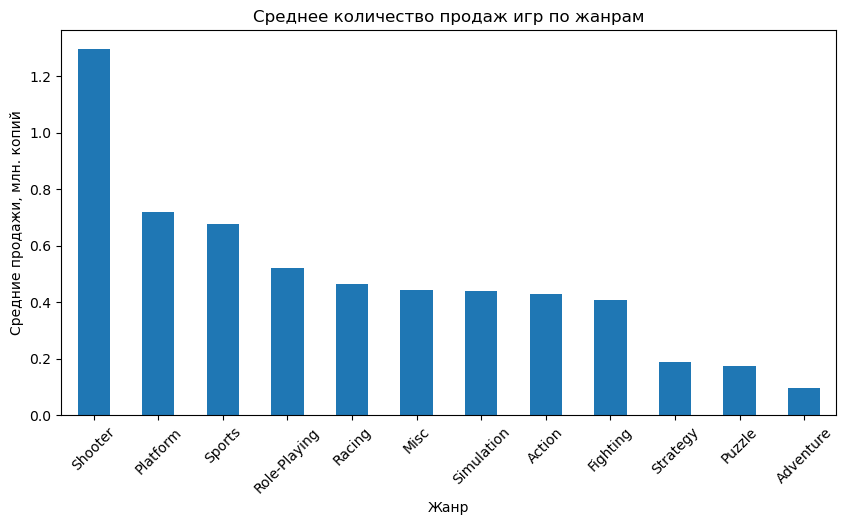

In [108]:
data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Среднее количество продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи, млн. копий')
plt.xticks(rotation=45)
plt.show()

In [109]:
data_actual.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.296723
Platform        0.717647
Sports          0.678165
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
Name: total_sales, dtype: float64

По средним продажам лидирует Shooter, затем Platform и Sports.

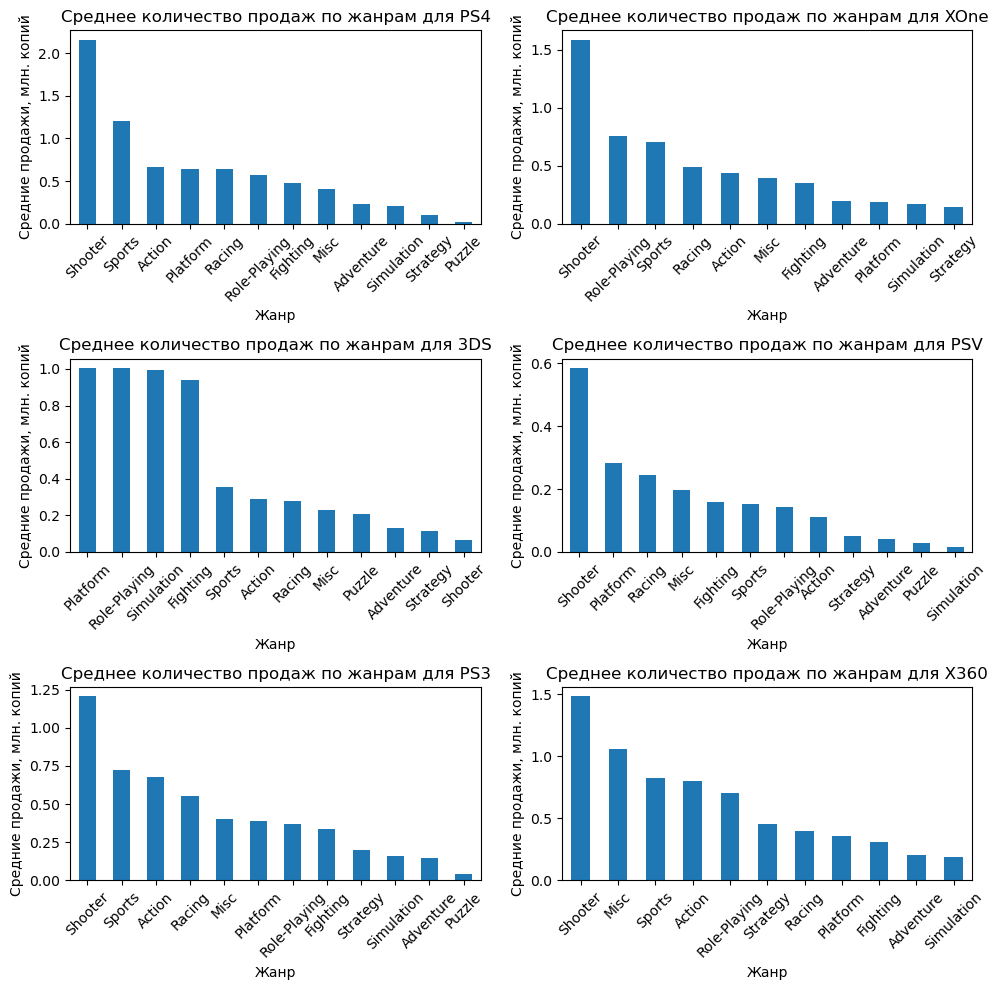

In [110]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
for i, platform in enumerate(['PS4','PSV', 'PS3', 'XOne', '3DS', 'X360']):
    (data_actual
     .query('platform == @platform')
     .groupby('genre')['total_sales']
     .mean()
     .sort_values(ascending=False)
     .plot(kind='bar', ax=axs[0+i%3, 0+i%2], figsize=(10, 10))
    )
    axs[0+i%3, 0+i%2].set_title('Среднее количество продаж по жанрам для ' + platform)
    axs[0+i%3, 0+i%2].set_xlabel('Жанр')
    axs[0+i%3, 0+i%2].set_ylabel('Средние продажи, млн. копий')
    axs[0+i%3, 0+i%2].tick_params('x', labelrotation=45)
fig.tight_layout() 
plt.show()

По среднему количеству продаж на всех платформах кроме 3DS лидирует Shooter.
+ На PS3 и PS4 кроме Shooter хорошие показатели у Sports и Action
+ На XOne кроме шутеров популярны Role-Playing
+ По средним продажам портативные платформы значительно отличаются между собой. PSV ближе к большим консолям - в лидерах Shooter, Racing, также хорошо продается Platform.
+ На 3DS популярны Platform, Role-Playing, Simulation и Fighting.

<a id='fixes_genre_median_sales'></a>Посмотрим на медианные продажи по жанрам.

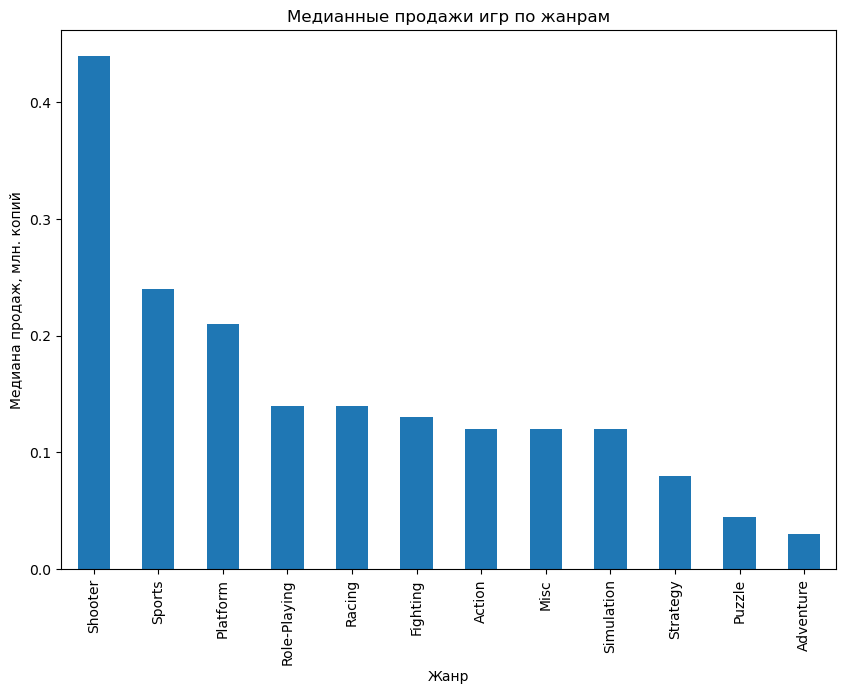

In [111]:
data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(10, 7))
plt.title('Медианные продажи игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Медиана продаж, млн. копий')
plt.show()

In [112]:
data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Action          0.120
Misc            0.120
Simulation      0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

По медианным продажам с большим отрывом лидирует Shooter, затем идут Sports и Platform.

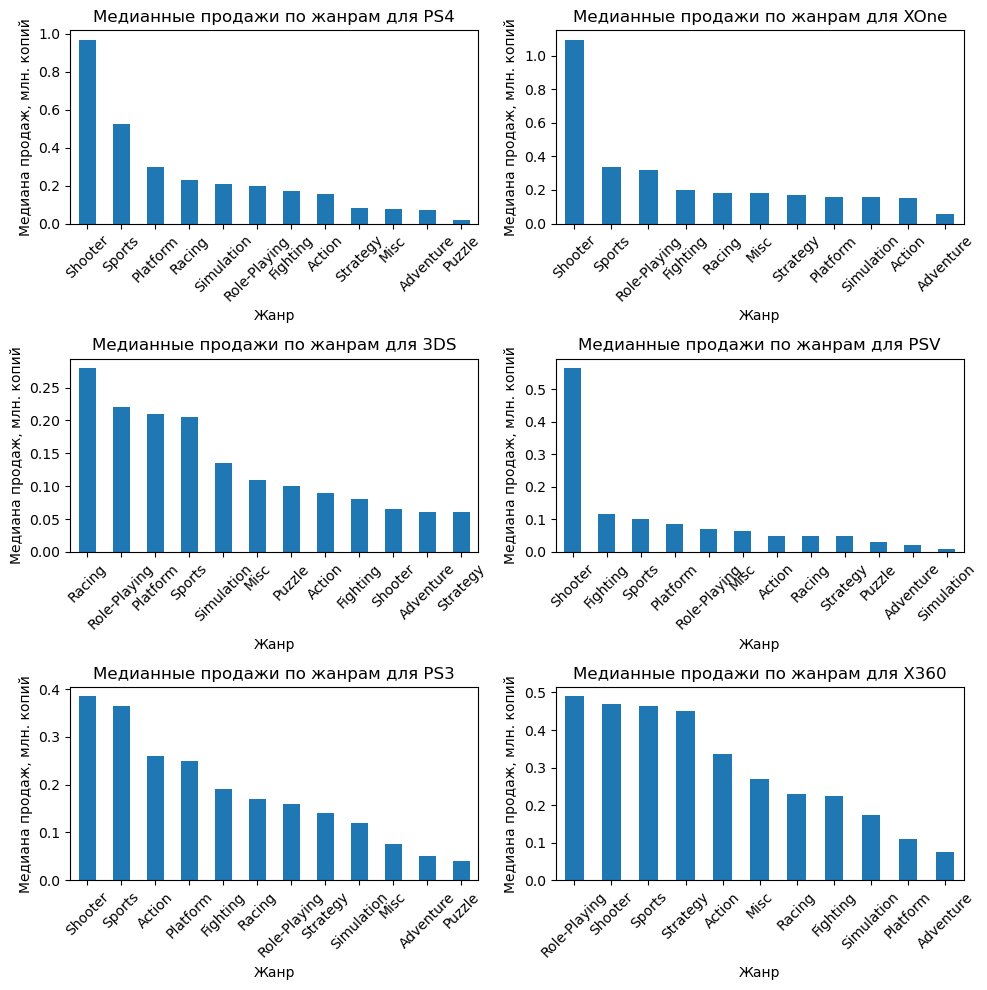

In [113]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
for i, platform in enumerate(['PS4','PSV', 'PS3', 'XOne', '3DS', 'X360']):
    (data_actual
     .query('platform == @platform')
     .groupby('genre')['total_sales']
     .median()
     .sort_values(ascending=False)
     .plot(kind='bar', ax=axs[0+i%3, 0+i%2], figsize=(10, 10))
    )
    axs[0+i%3, 0+i%2].set_title('Медианные продажи по жанрам для ' + platform)
    axs[0+i%3, 0+i%2].set_xlabel('Жанр')
    axs[0+i%3, 0+i%2].set_ylabel('Медиана продаж, млн. копий')
    axs[0+i%3, 0+i%2].tick_params('x', labelrotation=45)
fig.tight_layout() 
plt.show()

По медианным продажам на большинстве платформ (кроме 3DS и X360) лидирует Shooter.
На PS3, XOne и PS4 хорошие показатели у Sports, на X360 по медиане продаж лидирует Role-Playing, Sports на третьем месте.
Портативные платформы отличаются сильнее всего - на PSV кроме Shooter и Sports хорошие показатели у Fighting и Platform, а на 3DS в топе Racing, Role-Playing, Platform, Sports.

Action (лидер по суммарным продажам) по медианным продажам не показывает особо впечатляющих результатов. Видимо, суммарные продажи велики за счет нескольких хитов, а основная масса Action-игр продается не слишком хорошо.

Таким образом, наиболее популярными жанром является Shooter (лидирует по средним и медианным продажам и занимает второе место по суммарным). Action лидирует по количеству выпущенных игр и суммарным продажам, но медианные продажи невелики - то есть большинство игр жанра Action оказываются не очень успешными, суммарные продажи высоки за счет нескольких хитов. 

Также стоит обратить внимание на Sports и Role-Playing. Для портативных платформ также стоит обратить внимание на Platform,  Fighting, и Racing (для 3DS) - количество продаж у них достаточно высокое.

По всем показателям непопулярен жанр Puzzle. Strategy и Adventure также не показывают особо высоких продаж, хотя при этом игр в жанре Adventure выпускается достаточно много.

### Исследовательский анализ данных - итог

Провели исследовательский анализ данных.

1. В таблице есть данные за период с 1980 по 2016 год. Пик количества выпущенных игр приходится на 2008-2009 годы. После 2009 года количество выпущенных игр начинает снижаться. Больше всего игр выпускалось с 2002 по 2011 год.
2. Топ-10 платформ по суммарным продажам:
    + PS2 (1233.56)
    + X360 (961.24)
    + PS3 (931.34)
    + Wii (891.18)
    + DS (802.78)
    + PS (727.58)
    + PS4 (314.14)
    + GBA (312.88)
    + PSP (289.53)
    + 3DS (257.81)
    
    Средняя "продолжительность жизни" платформы (от выхода до прекращения выпуска игр) - около 10 лет.
    Обычно платформа популярна около 4-6 лет, после чего количество выпускаемых игр начинает заметно снижаться. Как правило, в это время начинает набирать популярность следующая платформа.
3. В качестве актуального периода для прогноза на 2017 год предлагается брать данные с 2012 по 2016 год.
4. По суммарному количеству продаж за актуальный период лидирует PS4. Топ-5 платформ:
    + PS4 
    + PS3
    + X360
    + 3DS
    + XOne
    
    Суммарные продажи на этих платформах составляют 82.5% от всех продаж за актуальный период.
5. Динамика популярности платформ за актуальный период:
    + Популярность PS3 и X360 снижается, на смену этим платформам приходит следующее поколение.
    + Популярность PS4 и XOne растет, не считая 2016 года, но за 2016 год могут быть неполные данные, т.к. это текущий год. Эти платформы можно считать потенциально прибыльными.
    + Популярность остальных платформ постепенно уменьшается. Это консоли предыдущего поколения и PC. Они замещаются следующими поколениями и, вероятно, мобильными устройствами.
6. У игр на PS4 с высокими оценками критиков чаще высокие продажи (корреляция есть, но не очень сильная - коэффициент 0.41). От оценок пользователей продажи не зависят. Для игр на других платформах тенденция примерно такая же - объем продаж несколько выше для игр с высокими оценками критиков, и практически не зависит от оценок пользователей.
7. <a id='fixes_genre_conclusion'></a>Наиболее популярными жанром является Shooter (лидирует по средним и медианным продажам и занимает второе место по суммарным).

    Также стоит обратить внимание на Sports и Role-Playing, у них неплохие показатели для большинства популярных платформ.

    Action лидирует по количеству выпущенных игр и суммарным продажам, но медианные продажи невелики - то есть большинство игр жанра Action оказываются не очень успешными, суммарные продажи высоки за счет нескольких хитов.    
  
    Для портативных платформ также стоит обратить внимание на Platform, Fighting, и Racing (для 3DS) - количество продаж у них достаточно высокое.
    
    Для разных платформ распределение жанров различается. Например, на 3DS не так популярны игры жанра Shooter (видимо, из-за позиционирования платформ Nintendo как более Family-friendly), зато на обеих портативных платформах есть ниша для Platform. На X360 и XOne Role-Playing игры более популярны, чем на PS3 и PS4.
    
    По всем показателям непопулярен жанр Puzzle. Strategy и Adventure также не показывают особо высоких продаж, хотя при этом игр в жанре Adventure выпускается достаточно много.

## Портрет пользователя каждого региона

### Топ-5 популярных платформ

Определим для пользователя каждого региона (NA, EU, JP) топ-5 самых популярных платформ.

In [114]:
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
Wii      17.45
PSV      10.98
DS        4.59
PSP       0.13
Name: na_sales, dtype: float64

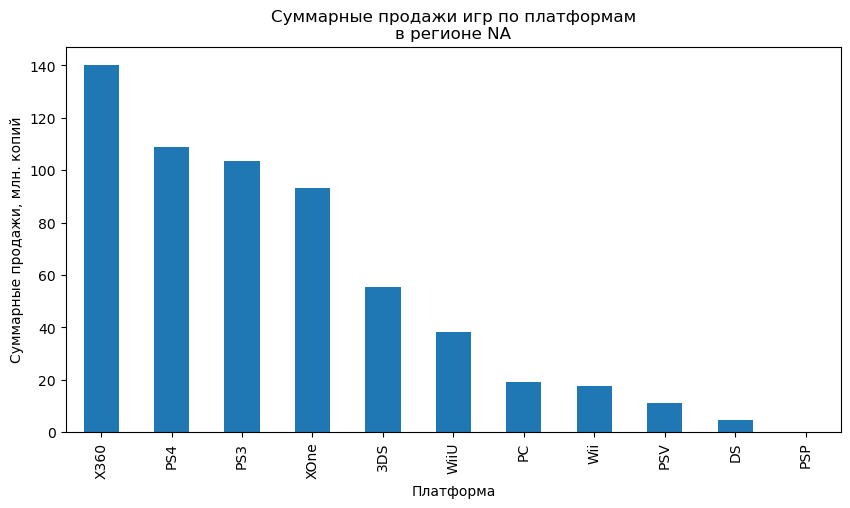

In [115]:
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по платформам\nв регионе NA')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

In [116]:
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
Wii      11.92
PSV      11.36
DS        3.53
PSP       0.42
Name: eu_sales, dtype: float64

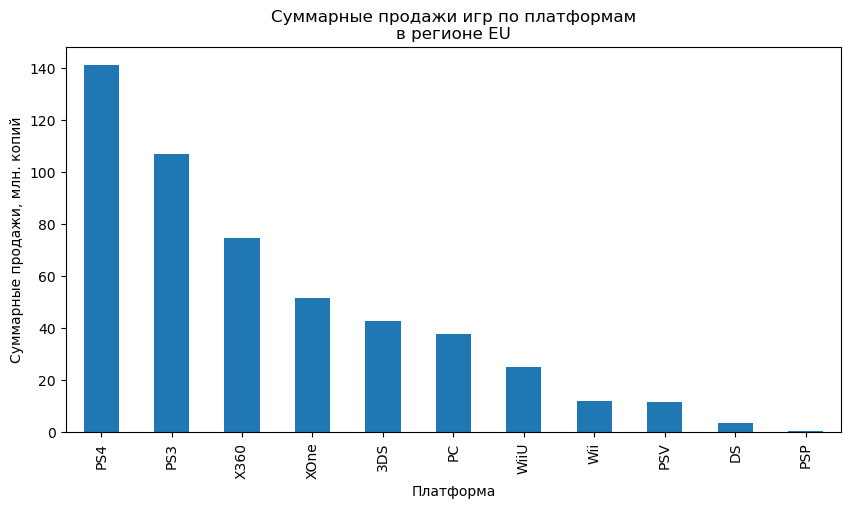

In [117]:
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по платформам\nв регионе EU')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

In [118]:
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.47
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

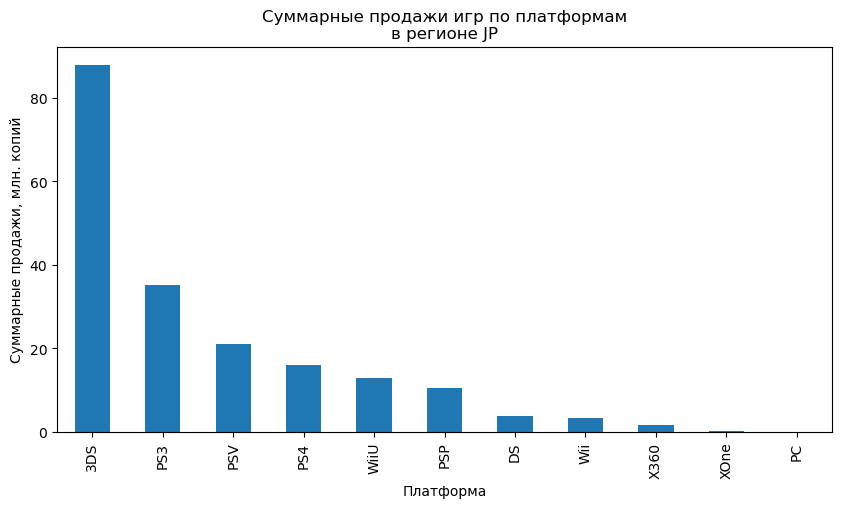

In [119]:
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по платформам\nв регионе JP')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

<a id='fixes_region_sales_pie'></a>Посмотрим на долю продаж каждой платформы из топ-5 по регионам.

In [120]:
data_na = (data_actual
 .groupby('platform')['na_sales']
 .sum()
 .sort_values(ascending=False)
 .copy()
 .reset_index()
)

In [121]:
data_na.loc[5:,'platform'] = 'other'

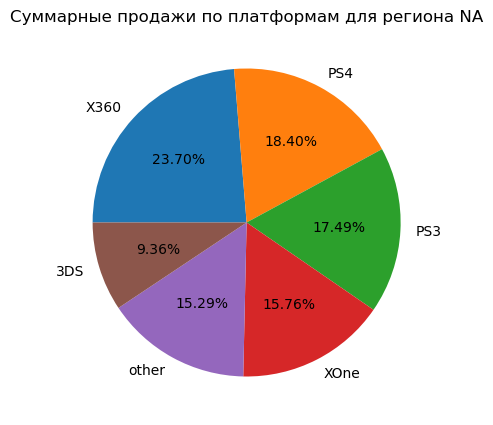

In [122]:
data_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(
    kind='pie',
    autopct='%1.2f%%', 
    counterclock=False, 
    startangle=180, 
    figsize=(5, 5)
)
plt.title('Суммарные продажи по платформам для региона NA')
plt.ylabel('')
plt.show()

In [123]:
data_eu = (data_actual
 .groupby('platform')['eu_sales']
 .sum()
 .sort_values(ascending=False)
 .copy()
 .reset_index()
)

In [124]:
data_eu.loc[5:,'platform'] = 'other'

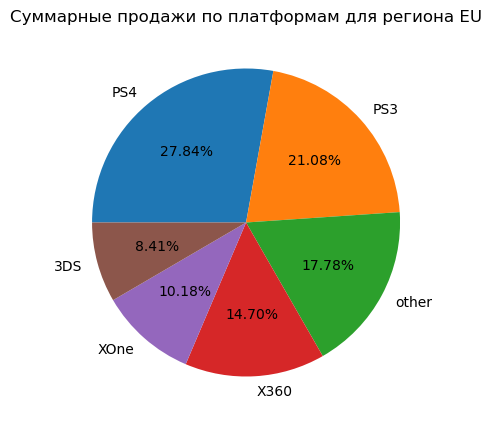

In [125]:
data_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(
    kind='pie',
    autopct='%1.2f%%', 
    counterclock=False, 
    startangle=180, 
    figsize=(5, 5)
)
plt.title('Суммарные продажи по платформам для региона EU')
plt.ylabel('')
plt.show()

In [126]:
data_jp = (data_actual
 .groupby('platform')['jp_sales']
 .sum()
 .sort_values(ascending=False)
 .copy()
 .reset_index()
)

In [127]:
data_jp.loc[5:,'platform'] = 'other'

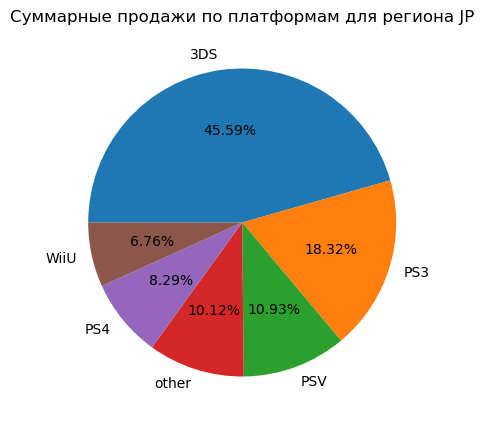

In [128]:
data_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(
    kind='pie',
    autopct='%1.2f%%', 
    counterclock=False, 
    startangle=180, 
    figsize=(5, 5)
)
plt.title('Суммарные продажи по платформам для региона JP')
plt.ylabel('')
plt.show()

Топ-5 платформ в Северной Америке:
+ X360 (23.7% от суммарных продаж по всем платформам в NA)
+ PS4 (18.4%)
+ PS3 (17.5%)
+ XOne (15.8%)
+ 3DS (9.4%)

Топ-5 платформ в Европе:
+ PS4 (27.8% от суммарных продаж по всем платформам в EU)
+ PS3 (21.1%)
+ X360 (14.7%)
+ XOne (10.2%)
+ 3DS (8.4%)

Топ-5 платформ в Японии:
+ 3DS (45.6% от суммарных продаж по всем платформам в JP)
+ PS3 (18.3%)
+ PSV (10.9%)
+ PS4 (8.3%)
+ WiiU (6.8%)

В Северной Америке и Европе сходный топ-5 платформ, но в Северной Америке самая популярная платформа - Xbox360 (на него приходится 23.7% от суммарных продаж по всем платформам в NA), тогда как в Европе - PS4 (27.8% от суммарных продаж по всем платформам в EU).
Значительно отличается топ-5 платформ в Японии - платформы Xbox и PC не пользуются популярностью, самые популярные платформы - японские Sony (PS3, PS4, PSV) и Nintendo (3DS, WiiU). Продажи игр на 3DS в Японии составляют почти половину (45.6%) от всех продаж игр в Японии.

В Японии по сравнению с Америкой и Европой популярнее портативные консоли - в топе для Японии есть 3DS (на первом месте с большим отрывом) и PSV. Суммарно портативные платформы составляют более половины всех продаж в Японии. В топе NA/EU из портативных только 3DS и только на 5 месте (в обоих регионах менее 10% от продаж на всех платформах).

### Топ-5 популярных жанров

Определим для каждого региона топ-5 популярных жанров.

In [129]:
data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

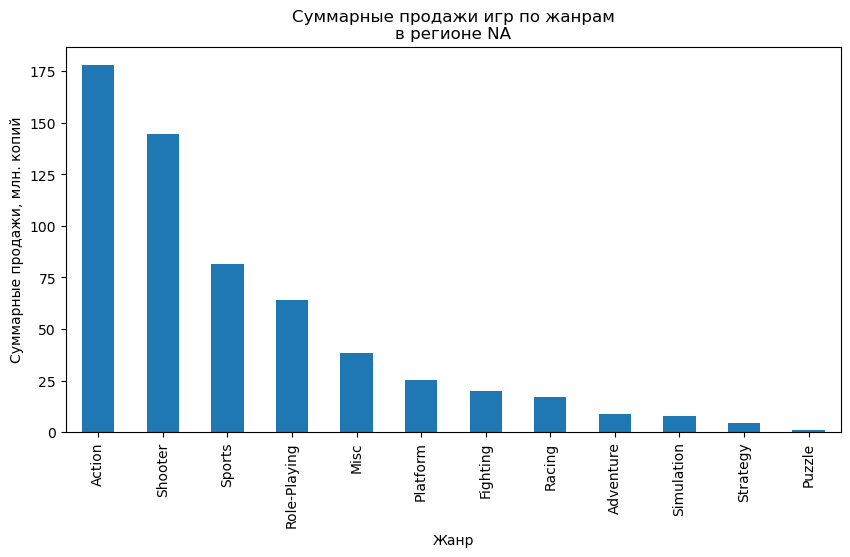

In [130]:
data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по жанрам\nв регионе NA')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

In [131]:
data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

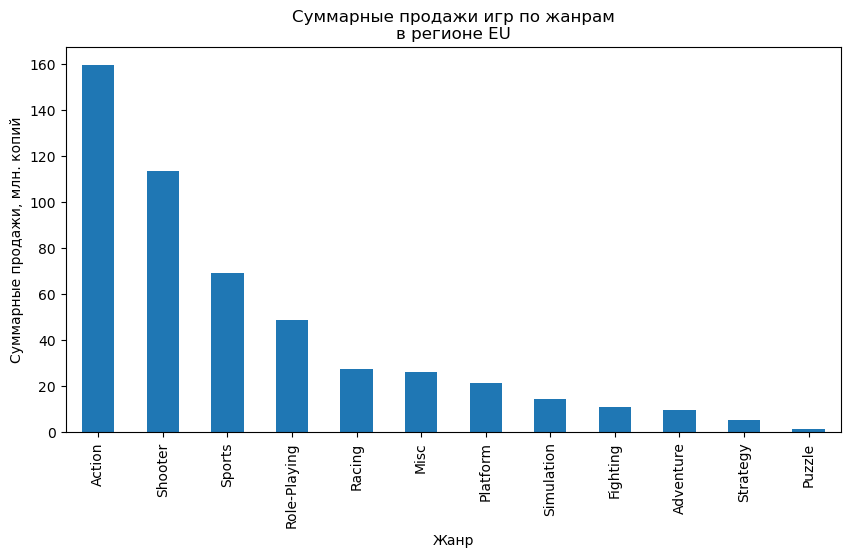

In [132]:
data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по жанрам\nв регионе EU')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

In [133]:
data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

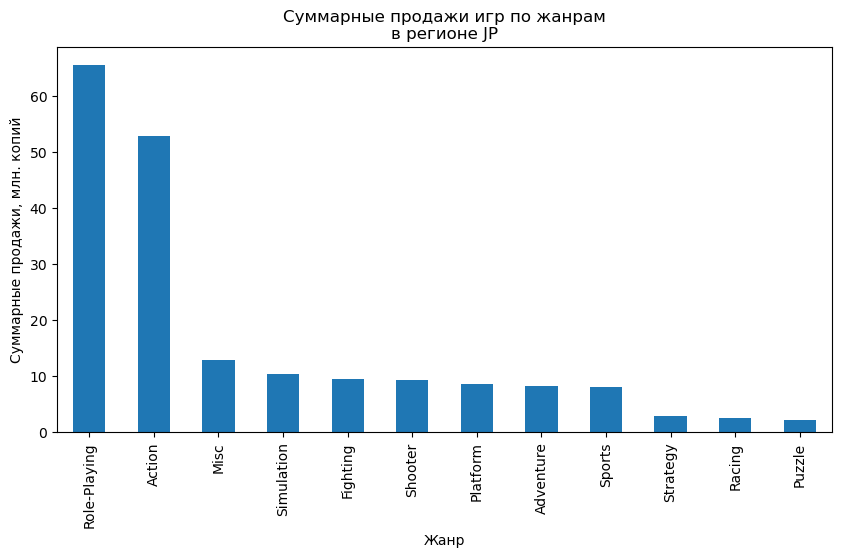

In [134]:
data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Суммарные продажи игр по жанрам\nв регионе JP')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн. копий')
plt.show()

Топ-5 жанров в Северной Америке:
+ Action
+ Shooter
+ Sports
+ Role-Playing
+ Misc

Топ-5 жанров в Европе:
+ Action
+ Shooter
+ Sports
+ Role-Playing
+ Racing

Топ-5 жанров в Японии:
+ Role-Playing
+ Action
+ Misc
+ Simulation
+ Fighting

Жанровые предпочтения Северной Америки и Европы схожи - в топе игры жанров Action, Shooter, Sports и Role-Playing. В Европе в топ также попали игры жанра Racing.

Жанровые предпочтения Японии значительно отличаются от Америки и Европы - в топе Role-Playing, Action, Simulation, Fighting.

### Влияние рейтинга на продажи в регионе

Посмотрим, игры с каким рейтингом популярнее в каждом регионе.

In [135]:
data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M          231.57
E          114.37
unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

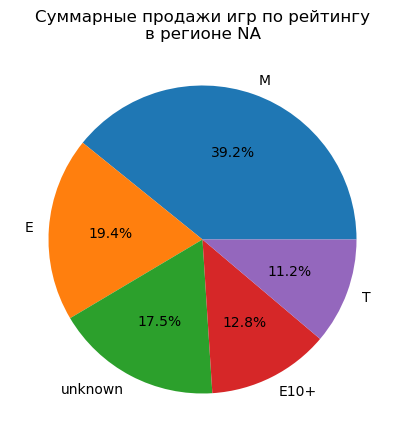

In [136]:
(data_actual
 .groupby('rating')['na_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
)
plt.title('Суммарные продажи игр по рейтингу\nв регионе NA')
plt.ylabel('')
plt.show()

In [137]:
data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M          193.96
E          113.03
unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

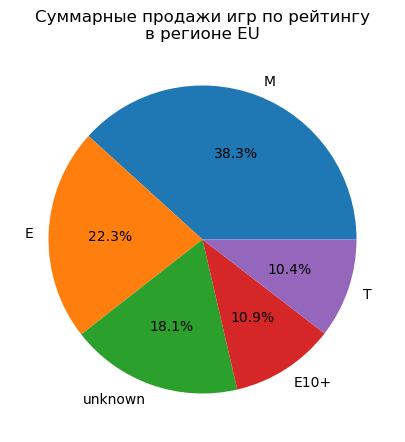

In [138]:
(data_actual
 .groupby('rating')['eu_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
)
plt.title('Суммарные продажи игр по рейтингу\nв регионе EU')
plt.ylabel('')
plt.show()

In [139]:
data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

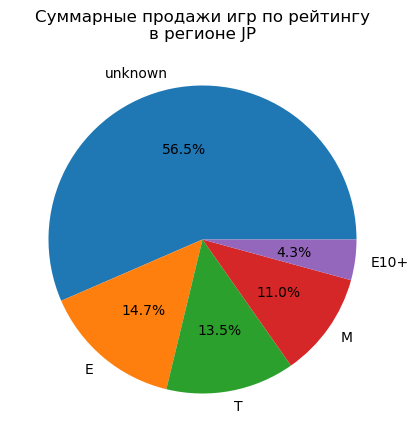

In [140]:
(data_actual
 .groupby('rating')['jp_sales']
 .sum()
 .sort_values(ascending=False)
 .plot(kind='pie', autopct='%1.1f%%', figsize=(10, 5))
)
plt.title('Суммарные продажи игр по рейтингу\nв регионе JP')
plt.ylabel('')
plt.show()

В Северной Америке и Европе наиболее популярны игры с рейтингом M. Это соответствует популярности в этих регионах игр в жанрах Action и Shooter.

В Японии больше половины продаж приходится на игры, не имеющие рейтинга в таблице. ESRB это американская рейтинговая система - вероятно, большинство японских игр просто не получало этот рейтинг. Среди игр, имеющих рейтинг, лидируют игры с рейтингом E и T. M только на третьем (четвертом считая unknown) месте, что опять же отличается от показателей в других регионах.

### Портрет пользователя каждого региона - итог

Пользователи в Северной Америке и Европе имеют сходные предпочтения: 
+ Самые популярные платформы - новое и предыдущее поколения PlayStation и Xbox (PS3, PS4, X360, XOne) плюс портативная 3DS. Основное отличие - в Америке популярнее всего X360 (на него приходится 23.7% от суммарных продаж по всем платформам в NA), а в Европе - PS4 (27.8% от суммарных продаж по всем платформам в EU).
+ Пользователи из Северной Америки и Европы предпочитают игры жанров Action, Shooter, Sports и Role-Playing. В Европе в топ также попали игры жанра Racing.
+ В Северной Америке и Европе наиболее популярны игры с рейтингом M. Вероятно, это связано с популярностью игр в жанре Shooter.

Предпочтения пользователей из Японии сильно отличаются от Европы и Северной Америки:
+ Самые популярные платформы - японские Sony (PS3, PS4, PSV) и Nintendo (3DS, WiiU). Лидирует 3DS - продажи игр на 3DS в Японии составляют почти половину (45.6%) от всех продаж игр в этом регионе.
+ В Японии по сравнению с Америкой и Европой популярнее портативные консоли - в топе для Японии есть 3DS (на первом месте с большим отрывом) и PSV. Суммарно портативные платформы составляют более половины всех продаж в Японии. В топе NA/EU из портативных только 3DS и только на 5 месте (в обоих регионах менее 10% от продаж на всех платформах).
+ Жанровые предпочтения Японии значительно отличаются от Америки и Европы - в топе Role-Playing, Action (с большим отрывом), далее Simulation, Fighting. Игры жанра Shooter находятся только на 6 месте.
+ Более половины продаж приходится на игры без рейтинга ESRB, т.к. ESRB - американский рейтинг. Для игр, имеющих рейтинг, лидируют игры с рейтингом E и T, M только на третьем (четвертом считая unknown) месте.

## Проверка гипотез

Проверим гипотезы о среднем пользовательском рейтинге игр.

### Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC

Проверим одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC.

In [141]:
'Средний пользовательский рейтинг Xbox One: {:.2f}'.format(data_actual.query('platform == "XOne"')['user_score'].mean())

'Средний пользовательский рейтинг Xbox One: 6.52'

In [142]:
'Средний пользовательский рейтинг PC: {:.2f}'.format(data_actual.query('platform == "PC"')['user_score'].mean())

'Средний пользовательский рейтинг PC: 6.43'

Зададим нулевую и альтернативную гипотезы.

*H<sub>0</sub>*: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

*H<sub>1</sub>*: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Проверим двустороннюю гипотезу о равенстве средних двух генеральных совокупностей. Уровень статистической значимости возьмем $\alpha$ = 0.05.

In [143]:
np.var(data_actual.query('platform == "XOne"')['user_score'], ddof=1)

1.9069968429360702

In [144]:
np.var(data_actual.query('platform == "PC"')['user_score'], ddof=1)

2.7704439971584156

Дисперсии выборок отличаются.

In [145]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(
    data_actual.query('platform == "XOne"')['user_score'], 
    data_actual.query('platform == "PC"')['user_score'], 
    equal_var=False,
    nan_policy='omit'
)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.5489537965134912
Нет оснований отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу.

С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Разные ли средние пользовательские рейтинги жанров Action и Sports

Проверим, различаются ли средние пользовательские рейтинги жанров Action и Sports.

In [146]:
'Средний пользовательский рейтинг Action: {:.2f}'.format(data_actual.query('genre == "Action"')['user_score'].mean())

'Средний пользовательский рейтинг Action: 6.83'

In [147]:
'Средний пользовательский рейтинг Sports: {:.2f}'.format(data_actual.query('genre == "Sports"')['user_score'].mean())

'Средний пользовательский рейтинг Sports: 5.46'

Зададим нулевую и альтернативную гипотезы.

*H<sub>0</sub>*: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

*H<sub>1</sub>*: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

Проверим двустороннюю гипотезу о равенстве средних двух генеральных совокупностей. Уровень статистической значимости возьмем $\alpha$ = 0.05.

In [148]:
np.var(data_actual.query('genre == "Action"')['user_score'], ddof=1)

1.8890840494348116

In [149]:
np.var(data_actual.query('genre == "Sports"')['user_score'], ddof=1)

3.0385428128839274

Дисперсии выборок отличаются.

In [150]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок
results = st.ttest_ind(
    data_actual.query('genre == "Action"')['user_score'], 
    data_actual.query('genre == "Sports"')['user_score'], 
    equal_var=False,
    nan_policy='omit'
)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу.

Есть основания считать, что пользовательский рейтинг жанров Action и Sport отличается.

### Проверка гипотез - итог

Подтвердились гипотезы, касающиеся среднего пользовательского рейтинга игр:
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковы
+ Средние пользовательские рейтинги жанров Action и Sports разные

## Общий вывод

Проанализировали данные о продажах игр на разных платформах, проверили некоторые гипотезы и определили характеристики перспективных игр для проведения рекламных кампаний в 2017 году.
1. Провели предобработку данных: преобразовали типы данных, добавили столбец с суммарными продажами, проверили данные на наличие пропущенных значений и дубликатов.
2. Провели исследовательский анализ данных:
    + В таблице есть данные за период с 1980 по 2016 год.
        Пик количества выпущенных игр приходится на 2008-2009 годы. После 2009 года количество выпущенных игр начинает снижаться.
        Больше всего игр выпускалось с 2002 по 2011 год.
    + Определили топ-10 платформ по суммарным продажам (млн. копий):
         * PS2 (1233.56)
         * X360 (961.24)
         * PS3 (931.34)
         * Wii (891.18)
         * DS (802.78)
         * PS (727.58)
         * PS4 (314.14)
         * GBA (312.88)
         * PSP (289.53)
         * 3DS (257.81)
    + Оценили среднюю "продолжительность жизни" платформы (от выхода до прекращения выпуска игр) - около 10 лет. В среднем платформа популярна около 4-6 лет, после чего количество выпускаемых игр начинает заметно снижаться. Как правило, в это время начинает набирать популярность следующая платформа.
    + Определили актуальный период данных для анализа - с 2012 по 2016 год.
    + Выявили топ-5 платформ по суммарным продажам за актуальный период:
        + PS4 
        + PS3
        + X360
        + 3DS
        + XOne        
        
        Суммарные продажи на этих платформах составляют 82.5% от всех продаж за актуальный период.
    + Изучили динамику популярности платформ за актуальный период:
        + Популярность PS3 и X360 снижается, на смену этим платформам приходит следующее поколение.
        + Популярность PS4 и XOne растет, не считая 2016 года, но за 2016 год могут быть неполные данные, т.к. это текущий год. Эти платформы можно считать потенциально прибыльными.
        + Популярность остальных платформ постепенно уменьшается. Это консоли предыдущего поколения и PC. Они замещаются следующими поколениями и, вероятно, мобильными устройствами, данных по которым у нас нет.
    + Изучили влияние оценок критиков и пользователей на продажи для самой популярной платформы и для всех платформ за актуальный период. У игр на PS4 (самая популярная платформа за актуальный период) с высокими оценками критиков чаще высокие продажи (корреляция есть, но не очень сильная - коэффициент 0.41). От оценок пользователей продажи не зависят.<br>
        Для игр на других платформах тенденция примерно такая же - объем продаж несколько выше для игр с высокими оценками критиков, и практически не зависит от оценок пользователей.
    + Определили наиболее популярные жанры. <a id='fixes_genre_final'></a>
        + наиболее популярными жанром является Shooter (лидирует по средним и медианным продажам и занимает второе место по суммарным). 
        + также стоит обратить внимание на Sports и Role-Playing, у них неплохие показатели для большинства популярных платформ. 
        + Action лидирует по количеству выпущенных игр и суммарным продажам, но медианные продажи невелики - то есть большинство игр жанра Action оказываются не очень успешными, суммарные продажи высоки за счет нескольких хитов.
        + для портативных платформ также стоит обратить внимание на Platform, Fighting, и Racing (для 3DS) - количество продаж у них достаточно высокое.
        + для разных платформ распределение жанров различается. Например, на 3DS не так популярны игры жанра Shooter (видимо, из-за позиционированием платформ Nintendo как более Family-friendly), зато на обеих портативных платформах есть ниша для Platform. На X360 и XOne Role-Playing игры более популярны, чем на PS3 и PS4.
        + по всем показателям непопулярен жанр Puzzle. Strategy и Adventure также не показывают особо высоких продаж, хотя при этом игр в жанре Adventure выпускается достаточно много.
3. Составили портрет пользователя каждого региона:
    + Пользователи в Северной Америке и Европе имеют сходные предпочтения: 
         + Самые популярные платформы - новое и предыдущее поколения PlayStation и Xbox (PS3, PS4, X360, XOne) плюс портативная 3DS. Основное отличие - в Америке популярнее всего X360 (на него приходится 23.7% от суммарных продаж по всем платформам в NA), а в Европе - PS4 (27.8% от суммарных продаж по всем платформам в EU). Портативные платформы не слишком популярны - в топе NA/EU из портативных только 3DS и только на 5 месте (в обоих регионах менее 10% от продаж на всех платформах).
         + Пользователи из Северной Америки и Европы предпочитают игры жанров Action, Shooter, Sports и Role-Playing. В Европе в топ также попали игры жанра Racing.
         + В Северной Америке и Европе наиболее популярны игры с рейтингом M. Вероятно, это связано с популярностью игр в жанре Shooter.
    + Предпочтения пользователей из Японии сильно отличаются от Европы и Северной Америки:
        + Самые популярные платформы - Sony (PS3, PS4, PSV) и Nintendo (3DS, WiiU). На первом месте 3DS с большим отрывом - 45.6% от всех продаж в регионе
        + В Японии по сравнению с Америкой и Европой популярнее портативные консоли - в топе для Японии есть 3DS и PSV. Суммарно портативные платформы составляют более половины всех продаж в Японии.
        + Жанровые предпочтения Японии значительно отличаются от Америки и Европы - в топе Role-Playing, Action (с большим отрывом), далее Simulation, Fighting. Игры жанра Shooter находятся только на 6 месте.
        + Более половины продаж приходится на игры без рейтинга ESRB, т.к. ESRB - американский рейтинг. Для игр, имеющих рейтинг, лидируют игры с рейтингом E и T, M только на третьем (четвертом считая unknown) месте.
4. Проверили гипотезы, касающиеся среднего пользовательского рейтинга игр. Обе гипотезы подтвердились:
    + Средние пользовательские рейтинги платформ Xbox One и PC одинаковы
    + Средние пользовательские рейтинги жанров Action и Sports разные


**Характеристики потенциально популярных игр для планирования рекламных кампаний на 2017 год)**:

Для регионов NA и EU:
+ Платформа: PS4, XOne.
+ Жанр: Shooter, Sports. Role-Playing для XBox, Platform для PlayStation. Action - только если игра из популярной серии, вроде GTA.
+ Высокий рейтинг критиков не обязателен, но будет плюсом.
+ Возрастной рейтинг игры может быть M - если говорить о количестве продаж, ограничения по возрасту покупателя компенсируются высокой популярностью таких игр.

Среди портативных платформ для NA и EU имеет смысл обратить внимание на 3DS.

Для региона JP приоритетны другие платформы и жанры:
+ Платформа: PS4, 3DS, WiiU
+ Жанр:  Role-Playing, Action, Fighting.

[В начало](#title)